**Plants Seedlings Classification**


# **Background and Context**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

# **Objective**

To classify the plant seedlings into their respective categories.


# **Dataset**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. 

There are 12 plant species (categories) in the dataset:

-  Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet


# **Setup**

**Import Libraries and Basics**

In [1]:
#visualkeras is a library to visualize cnn architectures
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 30.3 MB/s eta 0:00:00


In [3]:
#library for creating data paths
import os

#library for randomly selecting data points
import random

#library for performing numerical computations
import numpy as np

#library for data manipulation and analysis 
import pandas as pd

#library for data visualization
import seaborn as sns

#library for creating and showing data
import matplotlib.pyplot as plt

#library for reading and showing images
import matplotlib.image as mpimg

#Python Imaging Library to handle image files
from PIL import Image

#OpenCv for image and video processing
import cv2

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#importing all the required sub-modules from Keras
from keras import backend
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras import losses, optimizers
from keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from keras.callbacks import EarlyStopping, ModelCheckpoint  #regularization method to prevent the overfitting
from keras.utils.vis_utils import plot_model

#library to visualize model architecture
import visualkeras

In [4]:
#ignore warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

**Setup Google Drive**

In [5]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#parent directory where images are stored
image_file = '/content/drive/MyDrive/ML/CV/images.npy' #npy file containing images
label_file = '/content/drive/MyDrive/ML/CV/Labels.csv' #csv file containing the labels for each image of the npy file

##**Data Analysis**

First we will load the image_files and their corresponding labels.

In [7]:
#load the numpy array
img_array = np.load(image_file)

In [8]:
#visualize contents of array, index 0
img_array[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

**Shape of Array images**

In [9]:
#shape of the image array
img_array.shape

(4750, 128, 128, 3)

The image array contains 4,750 records. Each record has a length of 128 rows and 128 columns (resolution in pixels). And each element has three values representing Red, Green, Blue (RGB). 

In [10]:
#read the labels and store in a dataframe
label_df = pd.read_csv(label_file)

In [11]:
#display the head of the labels dataset
label_df.head(10)

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill
5  Small-flowered Cranesbill
6  Small-flowered Cranesbill
7  Small-flowered Cranesbill
8  Small-flowered Cranesbill
9  Small-flowered Cranesbill

**Shape of dataframe Labels**

In [12]:
#print shape of label dataframe
label_df.shape

(4750, 1)

There are 4750 records in total.

In [13]:
#display information of the label dataframe and its data type
label_df['Label'].info

<bound method Series.info of 0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: Label, Length: 4750, dtype: object>

We should convert 'Label' to a string type because later we will convert it to one-hot vectors.  To convert to one-hot vectors, we will use 'to_categorical' which expects an array of integers or numeric values. Otherwise type may throw an error.

In [14]:
#convert to string type
label_df['Label'] = label_df['Label'].astype(str)

**Number of Unique Classes**

In [15]:
#Number of unique classes (labels)
num_classes = label_df.nunique()[0]
print("The number of seed classes is ",num_classes)

The number of seed classes is  12


**Name of Classes**

In [16]:
#create an array containing the labels of classes
name_classes = label_df['Label'].unique()
name_classes

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

**Distribution of Classes**

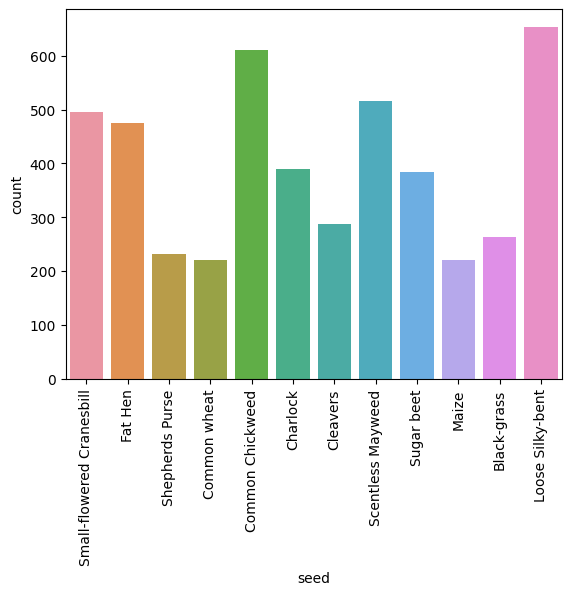

In [17]:
#visualize the seedlings label 
figsize=(14, 8)
count_plot = sns.countplot(data=label_df, x="Label")

#rotate x-axis labels
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)
count_plot.set(xlabel='seed')

plt.show()

In [18]:
#Number of items per categories
label_df.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

The data is imbalanced. Class Maize and Common Wheat are roughly 1/3 the size of Loose Silky-bent. 

####**Plotting images**

In [19]:
#convert dataframe to array
label_array = label_df.to_numpy().squeeze()

***Randomly from the entire set***

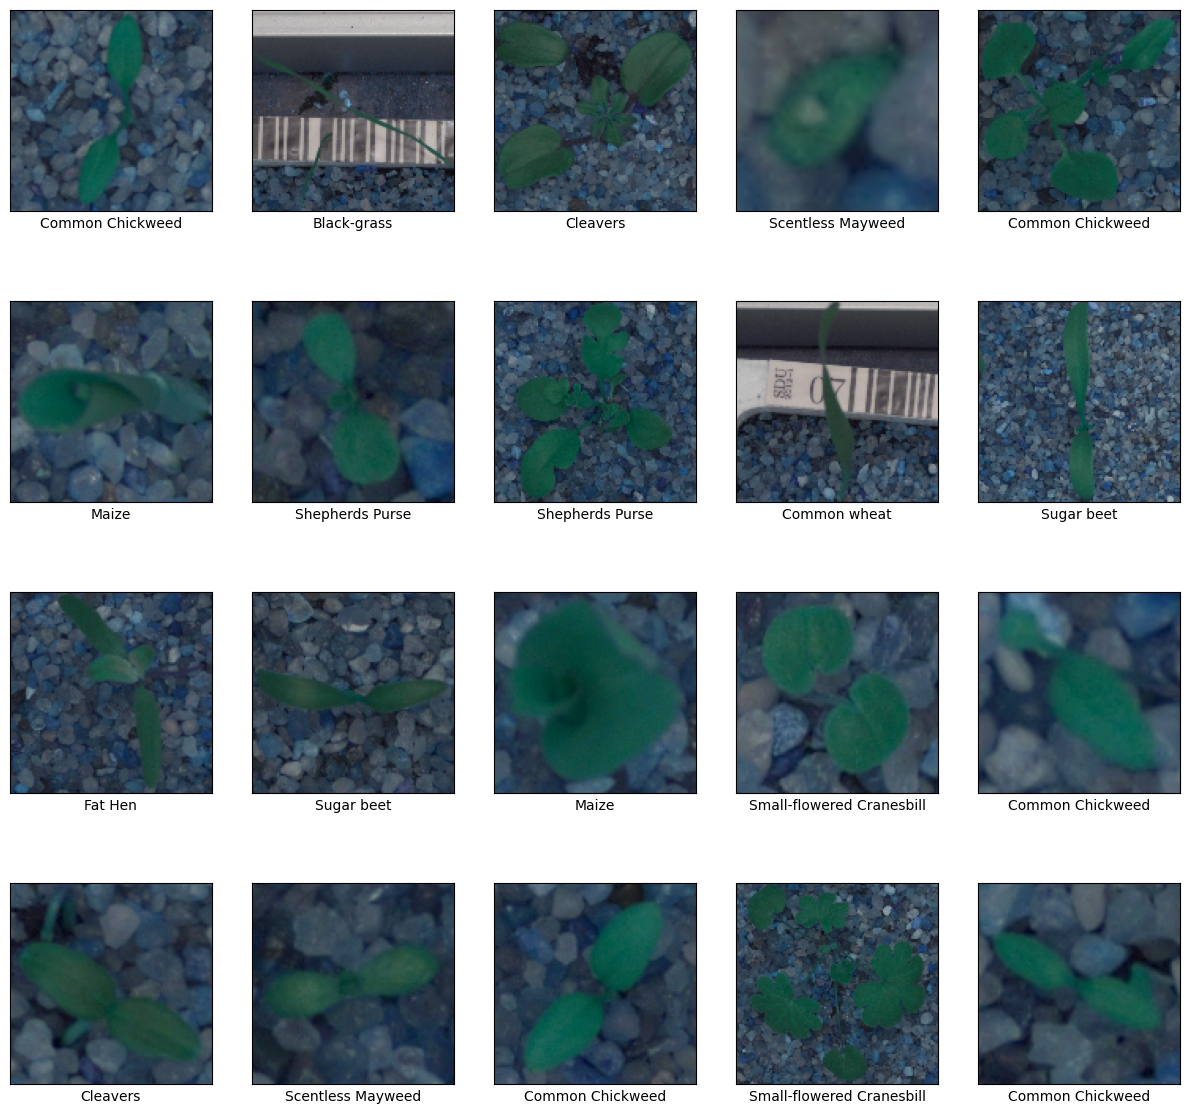

In [20]:
#Displaying images randomly

#Generate random indices to select rows x columns images
rows = 4
cols = 5

ix_img = np.random.choice(len(label_array), size=rows*cols, replace=False)

# Select the images and labels
images = img_array[ix_img]
labels = label_array[ix_img].tolist()

# Define the size of the figure
fig = plt.figure(figsize=(12, 12))

# Create a rows x cols grid of subplots
for i in range(rows*cols):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(images[i])
    ax.set_xlabel(str(labels[i]), fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# Show the figure
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

***Randomly for each class***

In [21]:
#Displaying images (randomly) from each category

num_images = 5

# Create a dictionary to store the indices of each category
category_indices = {}
for category in range(num_classes):
    category_indices[category] = label_df[label_df['Label'] == category].index.tolist()

# Loop through each unique label
for label in name_classes:
    
    # Get the indices of all images with the current label
    indices = np.where(label_df['Label'] == label)[0]
    
    # Choose num_images random indices
    random_indices = np.random.choice(indices, size=num_images, replace=False)
    
    # Get the corresponding images from "img_array"
    images = img_array[random_indices]
    
    # Create a plot of the images
    fig, ax = plt.subplots(1, num_images, figsize=(20, 4))
    for i, image in enumerate(images):
        ax[i].imshow(image)
        ax[i].axis('off')
    
    # Set the suptitle and adjust the spacing
    fig.suptitle(label, fontsize=16)
    fig.subplots_adjust(top=1.1, bottom=0.1)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### **Observations from EDA**

1. There are 12 unique classes. 
2. There are 4,750 records.
3. The classes are imbalanced as seen in the distribution plot. 
4. The class "Loose Silky-bent" is rougly three times larger than the class "Maize" or "Common wheat"
4. The images size is 128 x 128 pixes, with 3 channels (RGB).
5. There are images that are out of focus.
6. Some images are dark. 
7. Some images contain bar codes, stones, etc.
8. Some images also have random variations that may be due to camera sensor noise, compression artifacts, image processing, user error, etc.
9. Most seedlings are green against a blueshish rock-soil which do not contrast well with the dark green color of most seedlings.

From the dataset image analysis we foresee the need to remove noise from the images. To do this we can use Gaussian Blurring.



###**Remove Noise using Gaussian Blurring**

We will perform Gaussian Blurring to smooth the images by averaging the intensity of each pixel with the intensity of neighboring pixels.

(-0.5, 127.5, 127.5, -0.5)

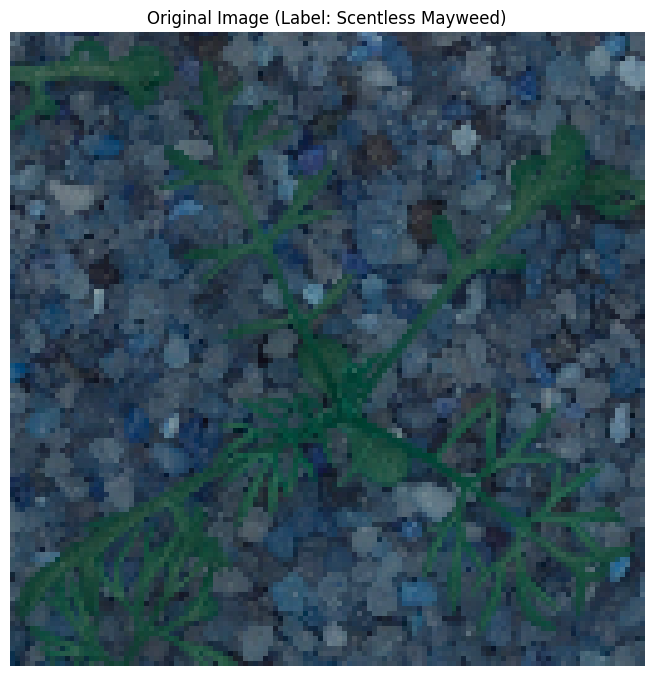

In [22]:
# Choose a random index for the image
index = np.random.randint(0, img_array.shape[0])

# Extract the image and its label
image = img_array[index, :, :, :]
label = label_df.iloc[index, 0]

fig = plt.figure(figsize=(18, 18))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image (Label: {})'.format(label))
plt.axis('off')

In [23]:
# Define the kernel size for the Gaussian blur
kernel_size = (3, 3)

# Apply Gaussian blur to each image in the img_array
for i in range(img_array.shape[0]):
    img = img_array[i,:,:,:]
    img = cv2.GaussianBlur(img, kernel_size, 0)
    img_array[i,:,:,:] = img

### **Apply Normalization**

After Gaussian Blurring we will scale the pixel values to a fixed range (i.e. 0 to 1). 

In [24]:
# Convert the data type of the img_array to float32
img_array = img_array.astype('float32')

# Normalize the pixel values to the range of 0 to 1
img_array = img_array / 255.0

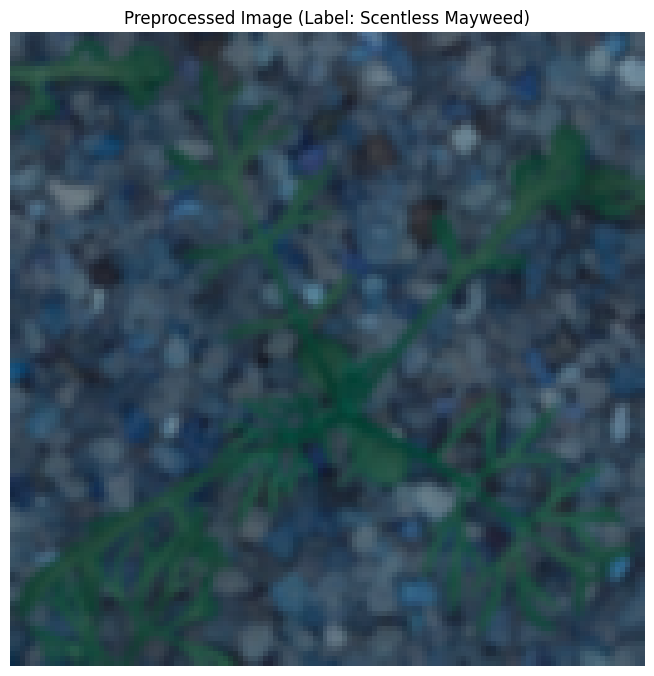

In [25]:
# Plot the preprocessed image

fig = plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 2)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Preprocessed Image (Label: {})'.format(label))
plt.axis('off')

# Show the plots
plt.show()

**Images after Gaussian Blurring and Normalization**

In [26]:
#Displaying images (randomly) from each category

num_images = 5

# Create a dictionary to store the indices of each category
category_indices = {}
for category in range(num_classes):
    category_indices[category] = label_df[label_df['Label'] == category].index.tolist()

# Loop through each unique label
for label in name_classes:
    
    # Get the indices of all images with the current label
    indices = np.where(label_df['Label'] == label)[0]
    
    # Choose num_images random indices
    random_indices = np.random.choice(indices, size=num_images, replace=False)
    
    # Get the corresponding images from "img_array"
    images = img_array[random_indices]
    
    # Create a plot of the images
    fig, ax = plt.subplots(1, num_images, figsize=(20, 4))
    for i, image in enumerate(images):
        ax[i].imshow(image)
        ax[i].axis('off')
    
    # Set the suptitle and adjust the spacing
    fig.suptitle(label, fontsize=16)
    fig.subplots_adjust(top=1.1, bottom=0.1)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

Beware that the differences in the appearance of the original image and the Gaussian-Normalized image are hard to notice by a human eye.

### **Define a Dictionary to map labels to integer values**

In [27]:
# Define a dictionary to map each label to a unique integer value

label_map = {'Small-flowered Cranesbill':0, 'Fat Hen':1, 'Shepherds Purse':2,
       'Common wheat':3, 'Common Chickweed':4, 'Charlock':5, 'Cleavers':6,
       'Scentless Mayweed':7, 'Sugar beet':8, 'Maize':9, 'Black-grass':10,
       'Loose Silky-bent':11}

# Convert the label strings to integer values using the label map
label_df['Label'] = label_df['Label'].map(label_map)

### **Splitting Data**

In [28]:
#splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(img_array,label_df['Label'], test_size=0.1, random_state=42, stratify=label_df['Label']) 

### **Treating Class Imbalance**

We can oversample the minority class by adding more samples to that minority classes doing augmentation, generating synthetic data, etc. We can undersample the majority class by removing samples from the majority class to balance the distribution. However we will lose information and although the distribution of the majority class to minitory class is 3 to 1, this may not be a good approach because our dataset is not very large. We can also use data augmentation. And we can also increase the weights of the minority classes.



The data is imbalanced as we have seen earlier. To avoid bias toward the majority class, or underfitting the minority class, we should balance the data.

Balancing the data on the Training set by adjusting weights.  

The main reason to use this technique is because reprocessing the images have a very high computational cost.

In [29]:
# Calculate class weights to balance the data
class_weights = {}
for i in range(12):
    class_weights[i] = np.sum(y_train == i) / len(y_train)

print(class_weights)

{0: 0.10432748538011696, 1: 0.09988304093567252, 2: 0.048654970760233916, 3: 0.04654970760233918, 4: 0.1286549707602339, 5: 0.08210526315789474, 6: 0.060350877192982454, 7: 0.10853801169590643, 8: 0.08116959064327485, 9: 0.04654970760233918, 10: 0.05543859649122807, 11: 0.13777777777777778}


In [30]:
# Use the class weights to balance the data
sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)

### **Make Data Compatible - One hot Encoding**

In [31]:
y_train.info

<bound method Series.info of 437      0
1571     4
838      1
4040    10
4707    11
        ..
746      1
1217     3
3058     7
4682    11
787      1
Name: Label, Length: 4275, dtype: int64>

In [32]:
# Convert the labels to one-hot vector (we only encode the y_train and y_test because these are categorical)
y_train_onehot = to_categorical(y_train, num_classes=12)
y_test_onehot = to_categorical(y_test, num_classes=12)

In [33]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

print("y_train one-hot encoded shape:",y_train_onehot.shape)
print("y_test one-hot encoded shape:",y_test_onehot.shape)


X_train shape: (4275, 128, 128, 3)
X_test shape: (475, 128, 128, 3)
y_train shape: (4275,)
y_test shape: (475,)
y_train one-hot encoded shape: (4275, 12)
y_test one-hot encoded shape: (475, 12)


The data is compatible with Keras. img_array is a 4D array with shape (4750, 128, 128, 3), with 4750 images, sized 128x128px and the 3 RGB channels.

We already one hot encoded y_train and y_test, so these are also compatible with Keras.


## **Convolutional Neural Network Models**

In [34]:
input_shape = (128,128,3)

In [328]:
#create dataframe to store scores
Scoresdf = pd.DataFrame(columns =['model', 'accuracy', 'layers', 'total parameters', 'neurons', 'optimizer'])

We will first start with a simple model of only 1 Convolution layer.

### **Model 0**

**Model Definition**

Layers : 4

Layer 1: Convolutional layer : 32 filters, Kernel_size = (3,3), Relu

Layer 2: MaxPooling2D layer

Layer 3: Flatten layer

Layer 4: Dense layer : 12 neurons, Relu

Optimizer: Adam

In [35]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [36]:
# Define the model architecture
model0 = Sequential()

#Convolution with 32 filters size 3,3 and relu
model0.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

#add max pooling to reduce the size of output of first convolution layer
model0.add(MaxPooling2D(pool_size=(2, 2)))

#reshape the output to a flat vector
model0.add(Flatten())

#add output layer
model0.add(Dense(num_classes, activation='softmax'))

# Compile the model
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 12)                1524108   
                                                                 
Total params: 1,525,004
Trainable params: 1,525,004
Non-trainable params: 0
_________________________________________________________________


**Model Visualization**

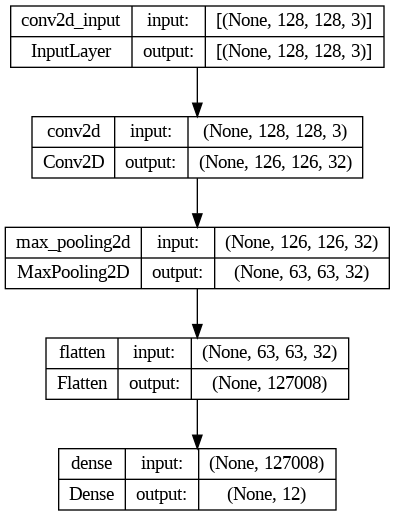

In [37]:
#visualize the CNN architecture
plot_model(model0, to_file='model0_plot.png', show_shapes=True, show_layer_names=True)

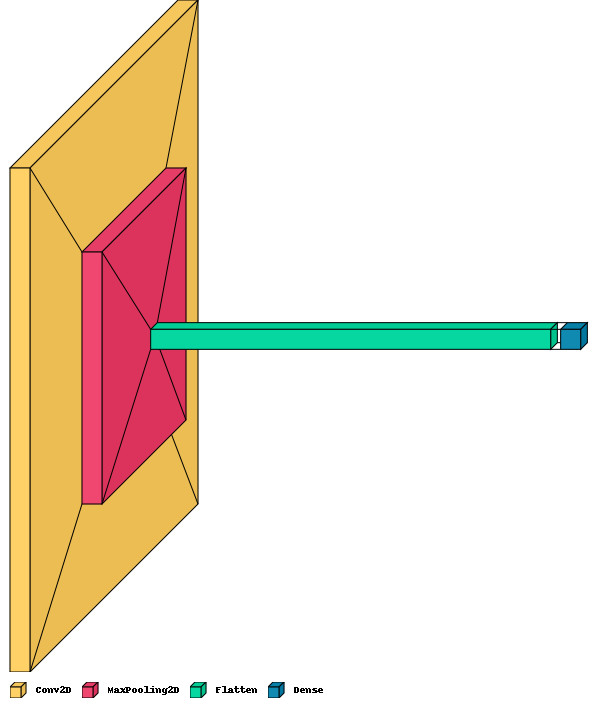

In [38]:
#visualize the CNN architecture using visualkeras
visualkeras.layered_view(model0, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history0 = model0.fit(X_train, y_train_onehot, epochs=30, batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/30
121/121 [==============================] - ETA: 0s - loss: 1.7578 - accuracy: 0.4195
Epoch 1: val_accuracy improved from -inf to 0.49299, saving model to best_model.h5
121/121 [==============================] - 11s 15ms/step - loss: 1.7578 - accuracy: 0.4195 - val_loss: 1.4395 - val_accuracy: 0.4930
Epoch 2/30
118/121 [============================>.] - ETA: 0s - loss: 1.1304 - accuracy: 0.6242
Epoch 2: val_accuracy improved from 0.49299 to 0.52570, saving model to best_model.h5
121/121 [==============================] - 1s 11ms/step - loss: 1.1293 - accuracy: 0.6252 - val_loss: 1.3579 - val_accuracy: 0.5257
Epoch 3/30
116/121 [===========================>..] - ETA: 0s - loss: 0.8899 - accuracy: 0.7077
Epoch 3: val_accuracy improved from 0.52570 to 0.56308, saving model to best_model.h5
121/121 [==============================] - 1s 12ms/step - loss: 0.8907 - accuracy: 0.7060 - val_loss: 1.3385 - val_accuracy: 0.5631
Epoch 4/30
118/121 [============================>.] - ETA: 0

Notice that at Epoch 16 the training stopped since the validation loss had continued to increase during 10 epochs. The highest validation accuracy was 0.65654 and validation loss 1.2791. 


**Model0 - Accuracy vs Epoch curve**

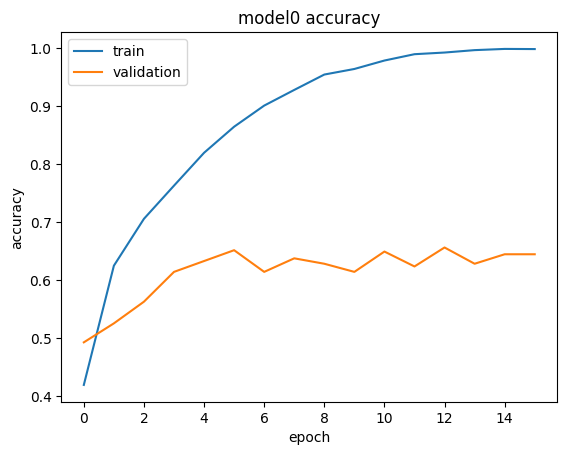

In [41]:
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('model0 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We can see that this model performs poorly. The model performs very well on training but very poorly in the validation. It is clearly overfitting.

**Evaluation of model0 model.evaluate using the Test data**

In [42]:
# Evaluate the model on the test data
score0 = model0.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score0[0])
print('Test accuracy:', score0[1])

Test loss: 1.5414196252822876
Test accuracy: 0.6547368168830872


In [43]:
# Test Prediction 
y_pred = model0.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 5ms/step


In [44]:
# Test Accuracy 
accuracyScore0 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore0)

0.6547368421052632


**Classification Report**

In [45]:
# Compute the classification report
cr0 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr0)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.79      0.82      0.80        50
                  Fat Hen       0.57      0.69      0.62        48
          Shepherds Purse       0.40      0.17      0.24        23
             Common wheat       0.41      0.32      0.36        22
         Common Chickweed       0.75      0.79      0.77        61
                 Charlock       0.88      0.90      0.89        39
                 Cleavers       0.70      0.48      0.57        29
        Scentless Mayweed       0.61      0.81      0.69        52
               Sugar beet       0.71      0.45      0.55        38
                    Maize       0.58      0.50      0.54        22
              Black-grass       0.36      0.46      0.41        26
         Loose Silky-bent       0.68      0.72      0.70        65

                 accuracy                           0.65       475
                macro avg       0.62

Charlock has a higher precision, recall, and F1 score (0.88, 90, 0.89) than all other classes. Black-grass has the opposite (all low: 0.36, 0.46, 0.41). 

Model0 has an overall accuracy of 0.65, it correctly predicted the seedling's class for 65% of the images in the test set. 

The precision, recall, and F1-score for each class vary, with some classes having good performance (e.g., Charlock) and others having poor performance (e.g., Shepherds Purse).

The macro average F1 score is 0.65, which means that Model0 is not so good overall. 
The weighted average F1 score is also .65 and this means that the model is not biased towards any particular class.


In [319]:
Scores_Models_df = Scores_Models_df.append({'model':'Model0','accuracy':accuracyScore0,'layers':'4','total parameters':'1,525,004', 'neurons':'12', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

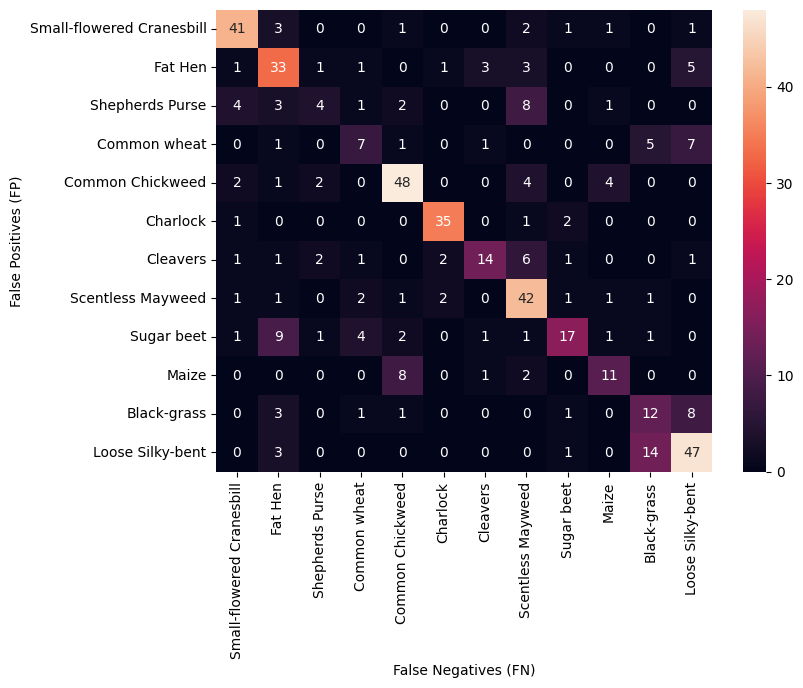

In [46]:
# Set the confusion matrix
cm0 = confusion_matrix(normal_y_test, y_test_pred_classes)

plt.figure(figsize=(8,6))

sns.heatmap(cm0, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Model0 is able to predict some classes with good accuracy but others are not predicted well. We can build better models to improve the performance on the other classes.

This model trained 1,525,004 parameters.

We called our first model, Model0 because this was a simple model with only one Convolution layer, so we didn't expect much from it.

###**Model 1**

**Model Definition**

This model builds on Model0. Model1 adds a second Convolutional layer and the fully connected layer has 128 neurons to improve the previous Model (Model0).

- Layers : 8
- Layer 1: Convolutional layer : 32 filters, Kernel_size = (3,3), Relu
- Layer 2: MaxPooling2D layer
- Layer 3: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu
- Layer 4: MaxPooling2D layer
- Layer 5: Flatten layer
- Layer 6: Dense layer : 128 neurons, Relu
- Layer 7: Droput layer: 0.5

- Optimizer: Adam

In [47]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [48]:
# Define the model architecture
model1 = Sequential()

#Convolution with 32 filters size 3,3 and relu
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

#add max pooling to reduce the size of output of first convolution layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

#Convolution with 64 filters size 3,3 and relu
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

#add max pooling to reduce the size of output of second convolution layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

#reshape the output to a flat vector
model1.add(Flatten())

#fully connected layer with 128 neurons
model1.add(Dense(128, activation='relu'))

#add dropout to prevent overfitting
model1.add(Dropout(0.5))

#add output layer
model1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

**Model Visualization**

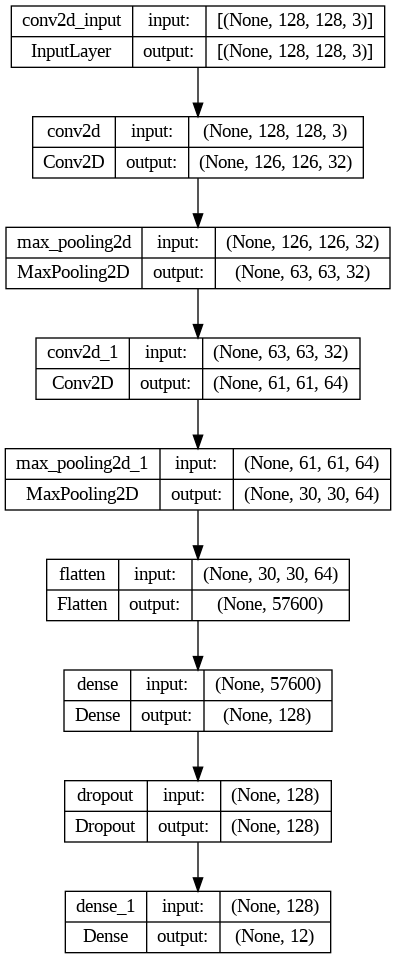

In [49]:
#visualize the CNN architecture
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

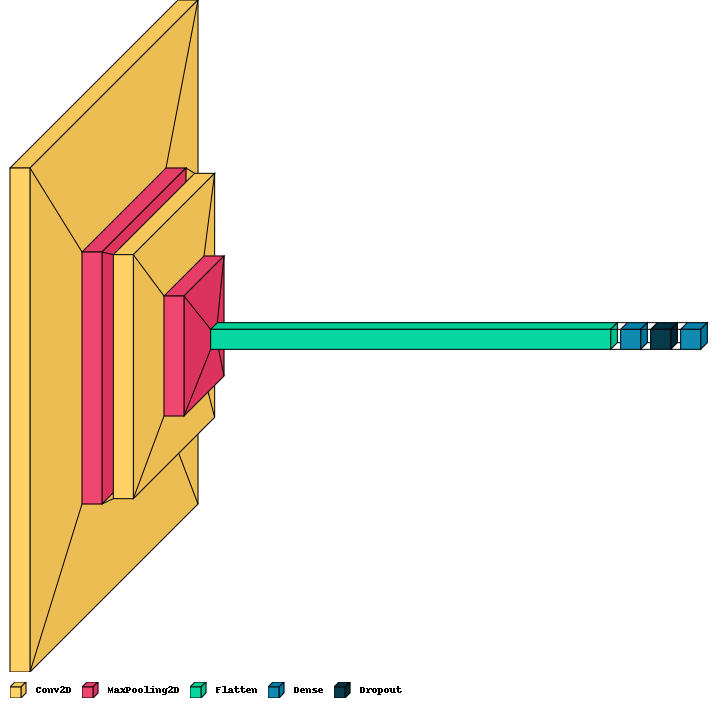

In [50]:
#visualize the CNN architecture using visualkeras
visualkeras.layered_view(model1, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [51]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 60 epochs and validation_split as 10%
history1 = model1.fit(X_train, 
          y_train_onehot,  
          epochs=60, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/60
121/121 [==============================] - ETA: 0s - loss: 1.9516 - accuracy: 0.3465
Epoch 1: val_accuracy improved from -inf to 0.40654, saving model to best_model.h5
121/121 [==============================] - 6s 25ms/step - loss: 1.9516 - accuracy: 0.3465 - val_loss: 1.6409 - val_accuracy: 0.4065
Epoch 2/60
120/121 [============================>.] - ETA: 0s - loss: 1.4514 - accuracy: 0.5044
Epoch 2: val_accuracy improved from 0.40654 to 0.57477, saving model to best_model.h5
121/121 [==============================] - 2s 19ms/step - loss: 1.4530 - accuracy: 0.5048 - val_loss: 1.2422 - val_accuracy: 0.5748
Epoch 3/60
118/121 [============================>.] - ETA: 0s - loss: 1.2194 - accuracy: 0.5789
Epoch 3: val_accuracy improved from 0.57477 to 0.60748, saving model to best_model.h5
121/121 [==============================] - 2s 19ms/step - loss: 1.2182 - accuracy: 0.5797 - val_loss: 1.1769 - val_accuracy: 0.6075
Epoch 4/60
118/121 [============================>.] - ETA: 0s

Notice that at Epoch 23 the training stopped since the validation loss had continued to increase during 10 epochs. The highest validation accuracy was 0.75 and validation loss of 1.1866. 


**Model1 - Accuracy vs Epoch curve**

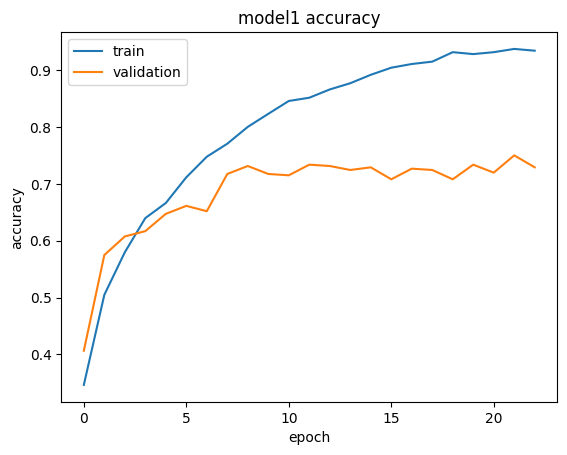

In [53]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Notice that the model shows overfitting. Past epoch 12 the validation loss doesn't reduce or begins to increase.

The model performs poorly as we see that the training accuracy is high but the validation accuracy is poor, indicating that the model is overfitting.

**Evaluation of model1 model.evaluate using the Test data**

In [54]:
# Evaluate the model on the test data
score1 = model1.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.2476131916046143
Test accuracy: 0.7326315641403198


In [55]:
# Test Prediction 
y_pred = model1.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 8ms/step


In [56]:
# Test Accuracy 
accuracyScore1 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore1)

0.7326315789473684


**Classification Report**

In [57]:
# Compute the classification report
cr1 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr1)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.85      0.92      0.88        50
                  Fat Hen       0.81      0.73      0.77        48
          Shepherds Purse       0.64      0.30      0.41        23
             Common wheat       0.71      0.55      0.62        22
         Common Chickweed       0.83      0.89      0.86        61
                 Charlock       0.69      0.97      0.81        39
                 Cleavers       0.74      0.69      0.71        29
        Scentless Mayweed       0.71      0.67      0.69        52
               Sugar beet       0.84      0.68      0.75        38
                    Maize       0.65      0.68      0.67        22
              Black-grass       0.36      0.38      0.37        26
         Loose Silky-bent       0.69      0.77      0.73        65

                 accuracy                           0.73       475
                macro avg       0.71

The model seems to perform well for classes such as Small-flowered Cranesbill, Common Chickweed, and Charlock with high precision, recall, and F1-score. 

The model performs poorly with classes like Black-grass, Shepherds Purse, and Common wheat that have low precision, recall, and F1-score. 

The macro-average and weighted-average F1-score are 0.69 and 0.73, which indicates that the model has an overall decent performance. 

However, this model can be improved, especially for the clasess that perform poorly.

In [329]:
Scoresdf = Scoresdf.append({'model':'Model1','accuracy':accuracyScore1,'layers':'8','total parameters':'7,393,868', 'neurons':'128', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

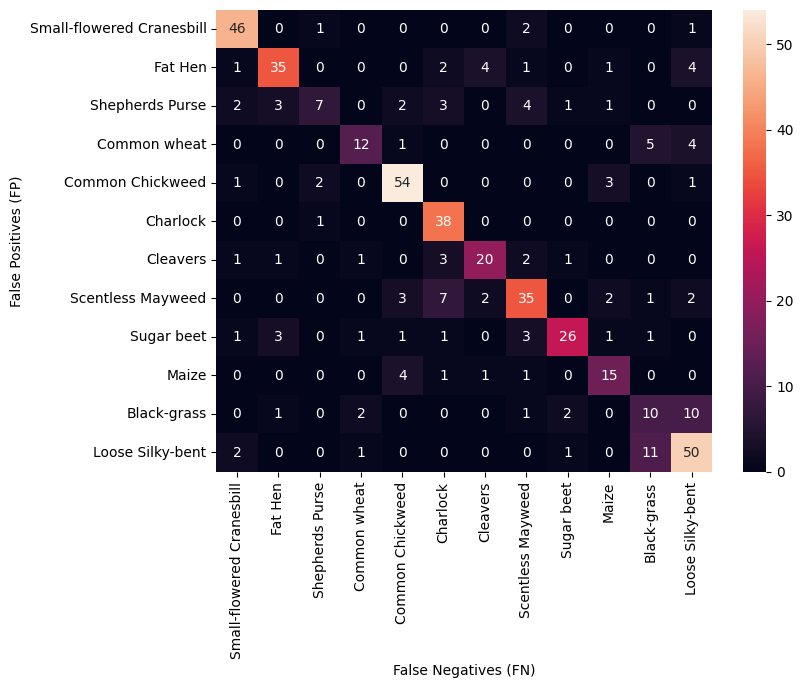

In [58]:
# Set the confusion matrix
cm1 = confusion_matrix(normal_y_test, y_test_pred_classes)

plt.figure(figsize=(8,6))

sns.heatmap(cm1, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Model1 one performs better than Model0 but the model isn't very good either. It trains 7,393,868 parameters which is about 4 times more parameters than Model0 and although this difference is massive, Model1 doesn't have a great performance either.




##**Model 2**

Model2 keeps growing, to try to improve on the previous model (Model1) we added more layers.

- Layers : 10

- Layer 1: Convolutional layer : 32 filters, Kernel_size = (3,3), Relu
- Layer 2: MaxPooling2D layer
- Layer 3: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu
- Layer 4: MaxPooling2D layer
- Layer 5: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu
- Layer 6: MaxPooling2D layer
- Layer 7: Flatten layer
- Layer 8: Dense layer : 128 neurons, Relu
- Layer 9: Droput layer: 0.5

- Optimizer: Adam

In [59]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [60]:
# Define the model architecture
model2 = Sequential()

#Convolution with 32 filters size 3,3 and relu
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))

#add max pooling to reduce the size of output of first convolution layer
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolution with 64 filters size 3,3 and relu
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#add max pooling to reduce the size of output of first convolution layer
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolution with 128 filters size 3,3 and relu
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

#add max pooling to reduce the size of output of first convolution layer
model2.add(MaxPooling2D(pool_size=(2,2)))

#reshape the output to a flat vector
model2.add(Flatten())

#fully connected layer with 128 neurons
model2.add(Dense(128, activation='relu'))

#add dropout to prevent overfitting
model2.add(Dropout(0.5))

#add output layer
model2.add(Dense(num_classes, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

**Model Visualization**

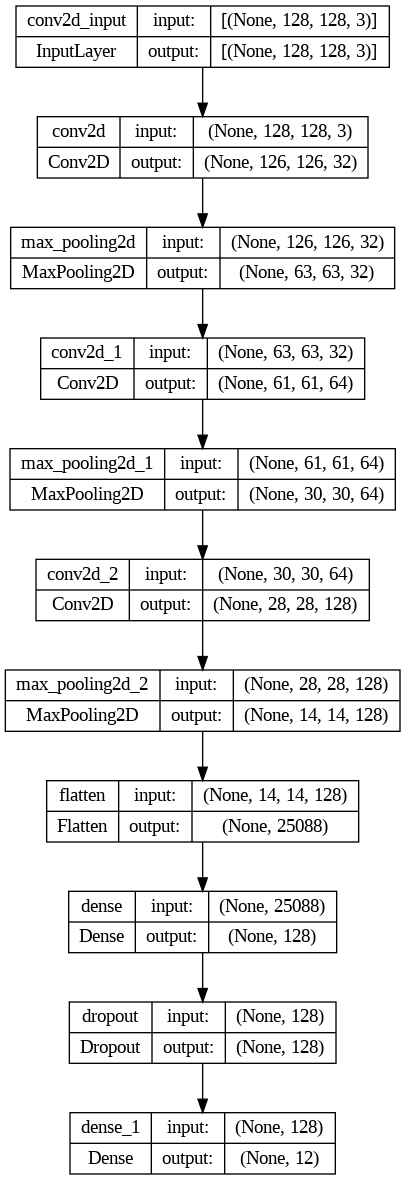

In [61]:
#visualize the cnn model architecture
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

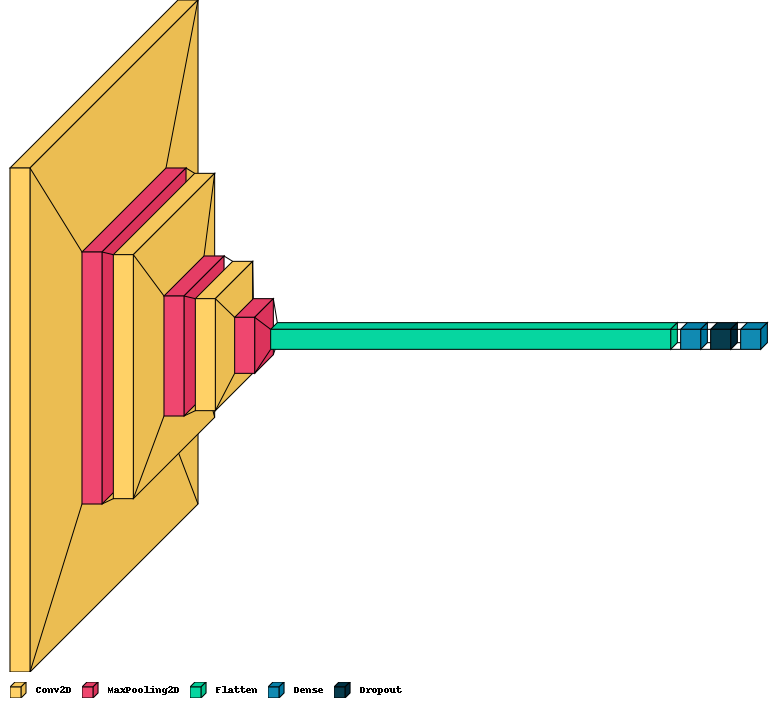

In [62]:
#visualize the cnn model architecture using visualkeras
visualkeras.layered_view(model2, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [63]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 40 epochs and validation_split as 10%
history2 = model2.fit(X_train, 
          y_train_onehot,  
          epochs=40, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/40
121/121 [==============================] - ETA: 0s - loss: 1.9661 - accuracy: 0.3408
Epoch 1: val_accuracy improved from -inf to 0.46729, saving model to best_model.h5
121/121 [==============================] - 5s 23ms/step - loss: 1.9661 - accuracy: 0.3408 - val_loss: 1.5358 - val_accuracy: 0.4673
Epoch 2/40
118/121 [============================>.] - ETA: 0s - loss: 1.4708 - accuracy: 0.4955
Epoch 2: val_accuracy improved from 0.46729 to 0.58178, saving model to best_model.h5
121/121 [==============================] - 2s 20ms/step - loss: 1.4663 - accuracy: 0.4975 - val_loss: 1.2714 - val_accuracy: 0.5818
Epoch 3/40
118/121 [============================>.] - ETA: 0s - loss: 1.2480 - accuracy: 0.5731
Epoch 3: val_accuracy improved from 0.58178 to 0.60280, saving model to best_model.h5
121/121 [==============================] - 3s 22ms/step - loss: 1.2457 - accuracy: 0.5745 - val_loss: 1.1380 - val_accuracy: 0.6028
Epoch 4/40
118/121 [============================>.] - ETA: 0s

The training stopped at epoch 21 because the validation loss had increased during 10 epochs. The highest validation accuracy was 0.780 and validation loss 0.7628.

**Model 2: Accuracy vs epochs plot**

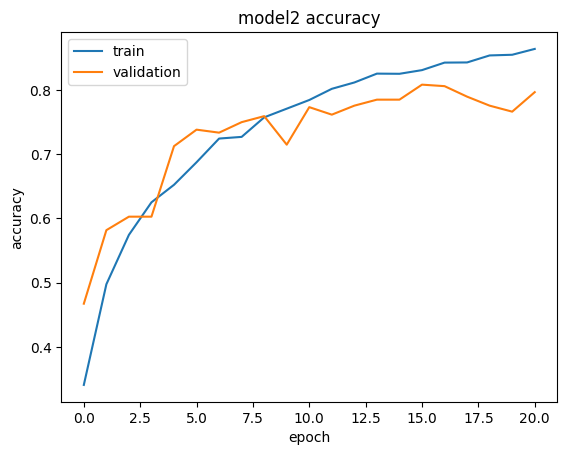

In [64]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Notice that somewhere around epoch 15 the validation loss begins to increase. 

Overall Model2 seems to perform better than the 2 previous models.

**Evaluation of model2 model.evaluate using the Test data**

In [125]:
# Evaluate the model on the test data
score2 = model2.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.9052645564079285
Test accuracy: 0.7915789484977722


In [124]:
# Test Prediction 
y_pred = model2.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 7ms/step


In [66]:
# Test Accuracy 
accuracyScore2 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore2)

0.791578947368421


**Classification Report**

In [67]:
# Compute the classification report
cr2 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr2)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.88      0.88      0.88        50
                  Fat Hen       0.86      0.88      0.87        48
          Shepherds Purse       0.85      0.48      0.61        23
             Common wheat       0.61      0.86      0.72        22
         Common Chickweed       0.83      0.95      0.89        61
                 Charlock       0.88      0.92      0.90        39
                 Cleavers       0.83      0.83      0.83        29
        Scentless Mayweed       0.68      0.81      0.74        52
               Sugar beet       0.87      0.71      0.78        38
                    Maize       0.61      0.64      0.62        22
              Black-grass       0.52      0.46      0.49        26
         Loose Silky-bent       0.89      0.72      0.80        65

                 accuracy                           0.79       475
                macro avg       0.77

The overall accuracy of Model2 is 0.79, which is a ok. The precision and recall values for each class are also mostly good, with some classes having higher values than others. 

The highest precision and recall values are achieved for "Small-flowered Cranesbill", "Fat Hen", "Common Chickweed", "Charlock", and "Cleavers", which means that the model can identify well these classes.

Some classes have lower precision and recall values, such as "Shepherds Purse", "Common wheat", "Scentless Mayweed", "Sugar beet", "Maize", and "Black-grass". 

In [330]:
Scoresdf = Scoresdf.append({'model':'Model2','accuracy':accuracyScore2,'layers':'10','total parameters':'3,306,188', 'neurons':'128', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

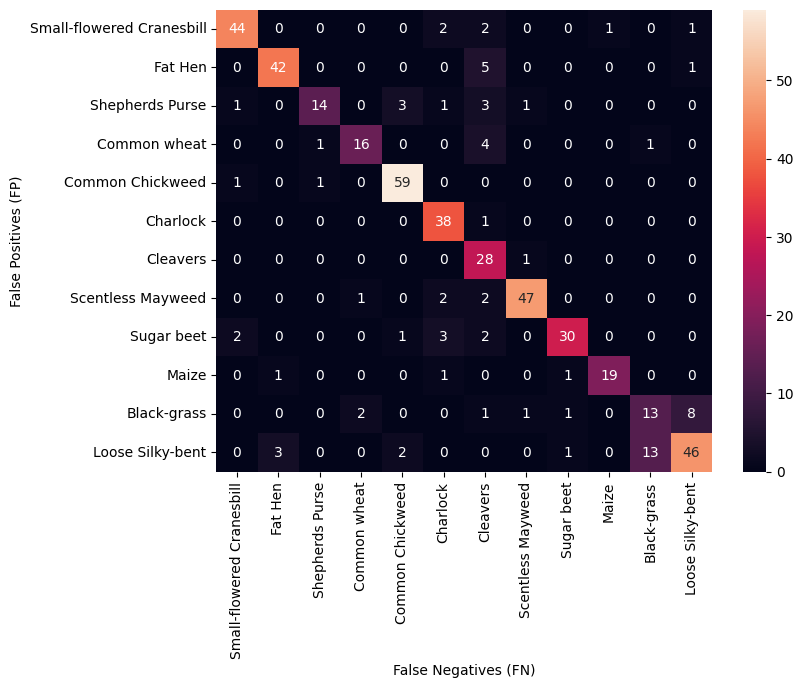

In [323]:
#set and plot the Confusion matrix
cm2 = confusion_matrix(normal_y_test, y_test_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm2, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Model2 performs better than Model0 and Model1. It actually performs OK. 

But we can improve the model for better performance.

##**Model 3**

To try to improve Model2, we change the optimizer from Adam to SGD.

- Layers : 10

- Layer 1: Convolutional layer : 32 filters, Kernel_size = (3,3), Relu
- Layer 2: MaxPooling2D layer
- Layer 3: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu
- Layer 4: MaxPooling2D layer
- Layer 5: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu
- Layer 6: MaxPooling2D layer
- Layer 7: Flatten layer
- Layer 8: Dense layer : 128 neurons, Relu
- Layer 9: Droput layer: 0.5

- Optimizer: SGD

In [82]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Lets used SGD as optimizer with the second model since we obtained a higher accuracy than the first model

In [83]:
# Using SGD Optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

**Model Implementation**

In [84]:
# Define the model architecture
model3 = Sequential()

#Convolution with 32 filters size 3,3 and relu
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))

#add max pooling to reduce the size of output of first convolution layer
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolution with 64 filters size 3,3 and relu
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

#add max pooling to reduce the size of output of first convolution layer
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolution with 128 filters size 3,3 and relu
model3.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

#add max pooling to reduce the size of output of first convolution layer
model3.add(MaxPooling2D(pool_size=(2,2)))

#reshape the output to a flat vector
model3.add(Flatten())

#fully connected layer with 128 neurons
model3.add(Dense(128, activation='relu'))

#add dropout to prevent overfitting
model3.add(Dropout(0.5))

#add output layer
model3.add(Dense(num_classes, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Print the model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

**Model Visualization**

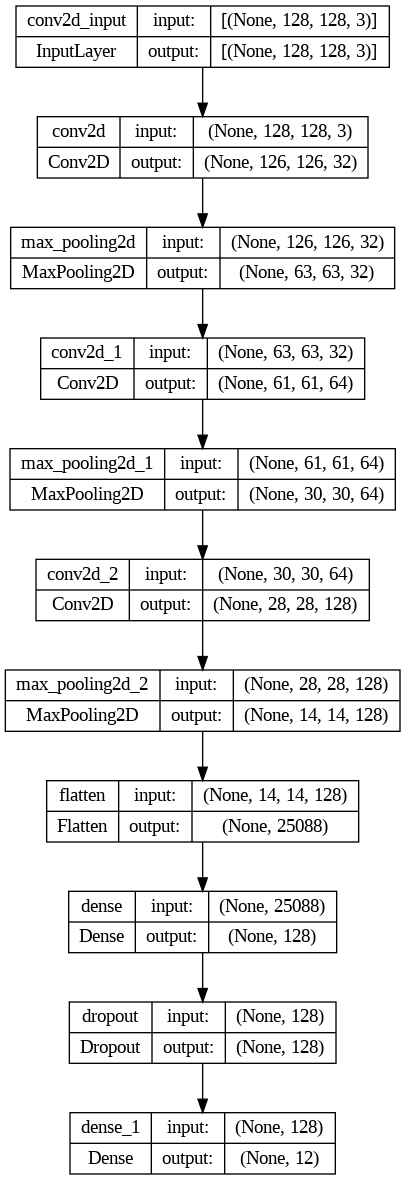

In [126]:
#visualize the cnn model architecture
plot_model(model3, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

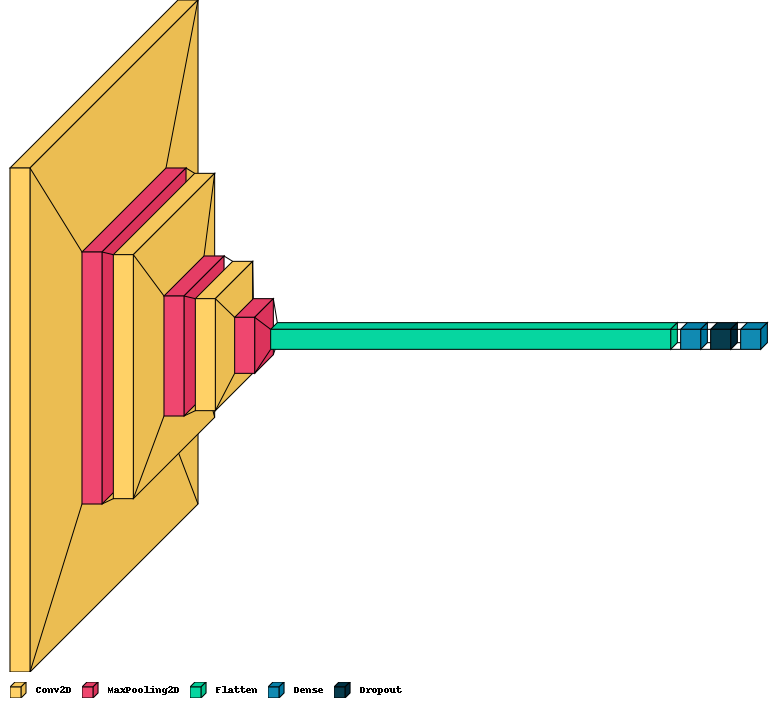

In [127]:
#visualize the cnn model architecture using visualkeras
visualkeras.layered_view(model3, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [85]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 40 epochs and validation_split as 10%
history3 = model3.fit(X_train, y_train_onehot, epochs=40, batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/40
120/121 [============================>.] - ETA: 0s - loss: 2.3845 - accuracy: 0.1630
Epoch 1: val_accuracy improved from -inf to 0.33178, saving model to best_model.h5
121/121 [==============================] - 3s 24ms/step - loss: 2.3832 - accuracy: 0.1638 - val_loss: 2.0441 - val_accuracy: 0.3318
Epoch 2/40
118/121 [============================>.] - ETA: 0s - loss: 1.8634 - accuracy: 0.3557
Epoch 2: val_accuracy improved from 0.33178 to 0.36916, saving model to best_model.h5
121/121 [==============================] - 3s 22ms/step - loss: 1.8603 - accuracy: 0.3569 - val_loss: 1.7121 - val_accuracy: 0.3692
Epoch 3/40
118/121 [============================>.] - ETA: 0s - loss: 1.6466 - accuracy: 0.4198
Epoch 3: val_accuracy improved from 0.36916 to 0.47897, saving model to best_model.h5
121/121 [==============================] - 2s 19ms/step - loss: 1.6427 - accuracy: 0.4211 - val_loss: 1.5588 - val_accuracy: 0.4790
Epoch 4/40
118/121 [============================>.] - ETA: 0s

Training stopped on epoch 28. The highest validation accuracy was 0.7921 where the validation loss was 0.844.

**Model3 Accuracy vs Epoch curve**

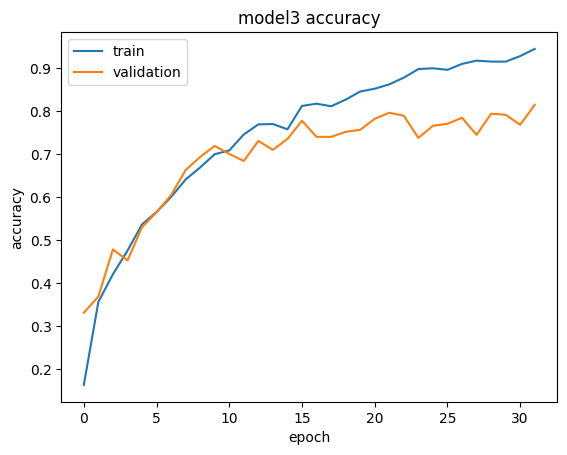

In [86]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Around epoch 20, the validation accuracy is highest. The model seems to be performing decently around epoch 22. There is some overfitting in the data.

**Evaluation of model3 model.evaluate using the Test data**

In [87]:
# Evaluate the model on the test data
score3 = model3.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.9419645071029663
Test accuracy: 0.75789475440979


In [88]:
# Test Prediction 
y_pred = model3.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 7ms/step


In [89]:
# Test Accuracy 
accuracyScore3 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore3)

0.7578947368421053


**Classification Report**

In [90]:
# Compute the classification report
cr3 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr3)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.90      0.86      0.88        50
                  Fat Hen       0.89      0.83      0.86        48
          Shepherds Purse       0.62      0.57      0.59        23
             Common wheat       0.55      0.73      0.63        22
         Common Chickweed       0.90      0.92      0.91        61
                 Charlock       0.77      0.92      0.84        39
                 Cleavers       0.73      0.93      0.82        29
        Scentless Mayweed       0.77      0.71      0.74        52
               Sugar beet       0.74      0.68      0.71        38
                    Maize       0.80      0.55      0.65        22
              Black-grass       0.39      0.50      0.44        26
         Loose Silky-bent       0.75      0.63      0.68        65

                 accuracy                           0.76       475
                macro avg       0.73

Model3s overall accuracy is at 0.76, and the macro average F1-score is at 0.73, while the weighted average is at 0.7.

The model performs well on some classes, such as Small-flowered Cranesbill, Fat Hen, Common Chickweed, and Charlock, but doesn't perform well with others like Black-grass and Shepherds Purse.

In [333]:
Scoresdf = Scoresdf.append({'model':'Model3','accuracy':accuracyScore3,'layers':'10','total parameters':'3,306,188', 'neurons':'128', 'optimizer':'SGD'},ignore_index=True)

**Confusion Matrix**

<Axes: >

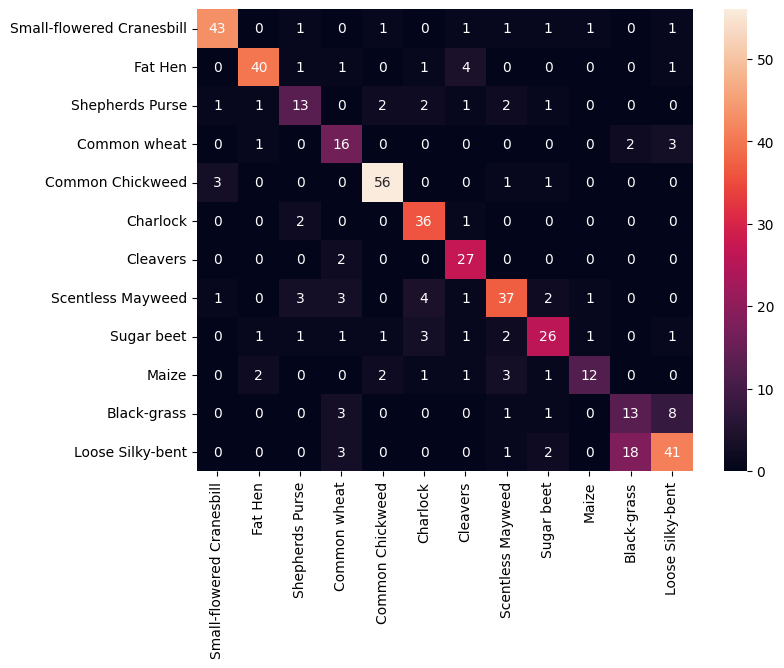

In [92]:
# Computer the Confusion matrix 
cm3 = confusion_matrix(normal_y_test, y_test_pred_classes)

plt.figure(figsize=(8,6))
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
sns.heatmap(cm3, xticklabels=name_classes, yticklabels=name_classes, annot=True)

Overall, model2 performs better than model3. 

##**Model 4**

Lets try adding more layers to try to improve the previous models.

Layers : 17

Layer 1: Convolutional layer : 32 filters, Kernel_size = (3,3), Relu

Layer 2: BatchNormalization()

Layer 3: MaxPooling2D layer

Layer 4: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu

Layer 5: BatchNormalization()

Layer 6: MaxPooling2D layer

Layer 7: Convolutional layer : 128 filters, Kernel_size = (3,3), Relu

Layer 8: BatchNormalization()

Layer 9: MaxPooling2D layer

Layer 7: Convolutional layer : 128 filters, Kernel_size = (3,3), Relu

Layer 8: BatchNormalization()

Layer 9: MaxPooling2D layer


Layer 10: Flatten layer

Layer 11: Dense layer : 256 neurons, Relu

Layer 12: BatchNormalization

Layer 13: Droput layer: 0.5

Optimizer: Adam

In [279]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [280]:
# initialized a sequential model
model4 = Sequential()

model4.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

**Model Visualization**

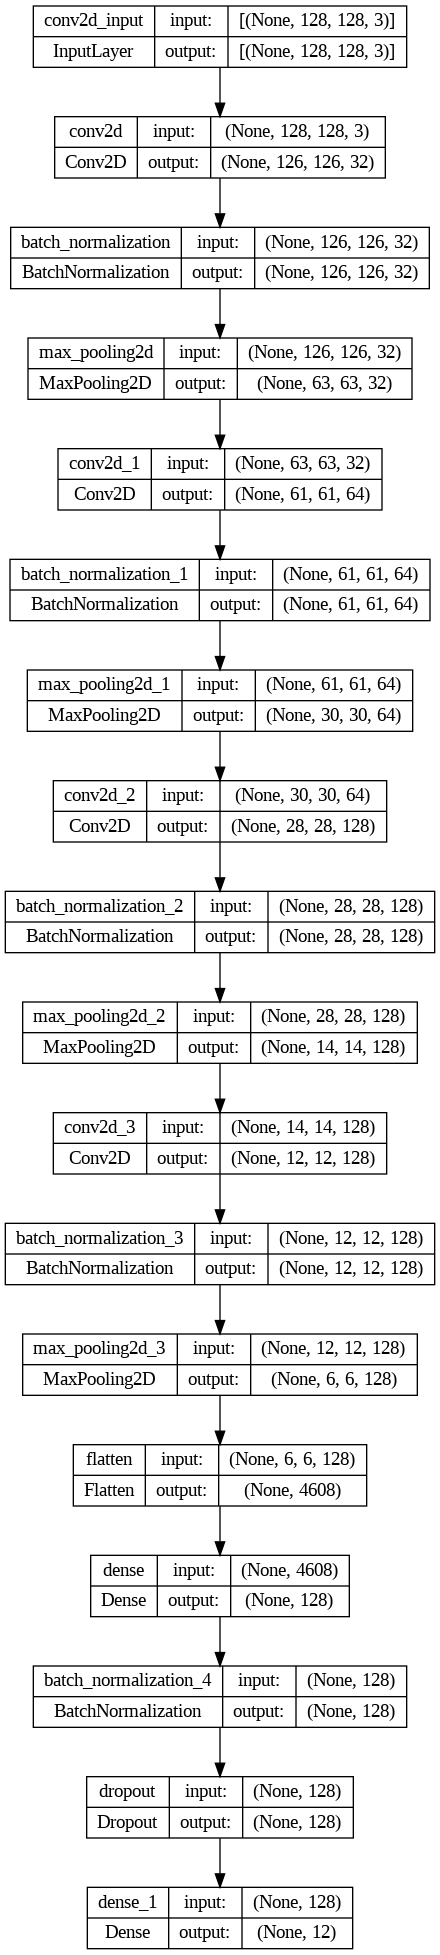

In [281]:
#visualize model4 architecture
plot_model(model4, to_file='model4_plot.png', show_shapes=True, show_layer_names=True)

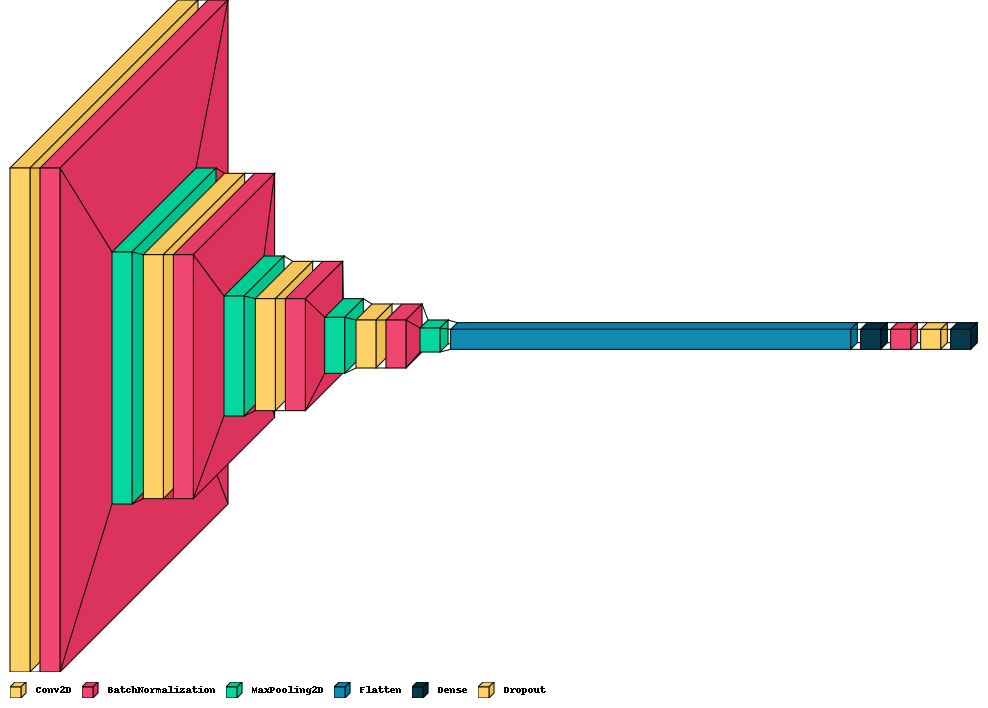

In [282]:
#visualize model4 architecture using visualkeras
visualkeras.layered_view(model4, legend=True)

**Early Stopping**

In [283]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 100 epochs and validation_split as 10%
history4=model4.fit(X_train, 
          y_train_onehot,  
          epochs=100, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc]) 

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 1.6494 - accuracy: 0.4936
Epoch 1: val_accuracy improved from -inf to 0.06308, saving model to best_model.h5
121/121 [==============================] - 7s 32ms/step - loss: 1.6494 - accuracy: 0.4936 - val_loss: 7.1415 - val_accuracy: 0.0631
Epoch 2/100
121/121 [==============================] - ETA: 0s - loss: 0.8717 - accuracy: 0.7200
Epoch 2: val_accuracy improved from 0.06308 to 0.12150, saving model to best_model.h5
121/121 [==============================] - 3s 25ms/step - loss: 0.8717 - accuracy: 0.7200 - val_loss: 10.6082 - val_accuracy: 0.1215
Epoch 3/100
121/121 [==============================] - ETA: 0s - loss: 0.6221 - accuracy: 0.7933
Epoch 3: val_accuracy did not improve from 0.12150
121/121 [==============================] - 3s 25ms/step - loss: 0.6221 - accuracy: 0.7933 - val_loss: 8.8956 - val_accuracy: 0.1215
Epoch 4/100
121/121 [==============================] - ETA: 0s - loss: 0.5206 - accuracy: 0.

Training stopped on epoch 33. The highest validation accuracy was 0.8925 where the validation loss was 0.3573.

**Model4 Accuracy vs Epoch curve**

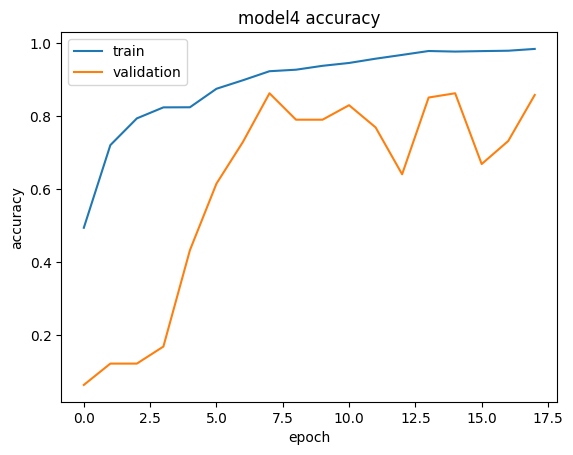

In [284]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Notice that the model tends to overfit as epochs increased.

**Evaluation of model4 model.evaluate using the Test data**

In [289]:
# Evaluate the model on the test data
score4 = model4.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.6450297832489014
Test accuracy: 0.8336842060089111


In [290]:
# Test Prediction 
y_pred = model4.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 8ms/step


In [291]:
# Test Accuracy 
accuracyScore4 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore4)

0.8336842105263158


**Classification Report**

In [292]:
# Compute the classification report
cr4 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr4)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.92      0.88      0.90        50
                  Fat Hen       0.91      0.88      0.89        48
          Shepherds Purse       0.88      0.61      0.72        23
             Common wheat       0.84      0.73      0.78        22
         Common Chickweed       0.91      0.97      0.94        61
                 Charlock       0.81      0.97      0.88        39
                 Cleavers       0.58      0.97      0.73        29
        Scentless Mayweed       0.94      0.90      0.92        52
               Sugar beet       0.91      0.79      0.85        38
                    Maize       0.95      0.86      0.90        22
              Black-grass       0.48      0.50      0.49        26
         Loose Silky-bent       0.82      0.71      0.76        65

                 accuracy                           0.83       475
                macro avg       0.83

Model4 has an overall accuracy of 83%.

The precision scores range from 0.48 to 0.95, indicating that the model's ability to correctly identify positive instances varies by class. For example, the model has high precision in identifying Charlock and Cleavers, while it has relatively lower precision in identifying Black-grass and Shepherds Purse.

The recall scores range from 0.50 to 0.97, indicating that the model's ability to correctly identify positive instances also varies by class. For example, the model has high recall in identifying Common Chickweed and Charlock, while it has relatively lower recall in identifying Black-grass and Shepherds Purse.

The F1-scores are a harmonic mean of precision and recall and range from 0.49 to 0.92. The F1-score provides a balance between precision and recall, indicating the overall performance of the model for each class.



In [331]:
Scoresdf = Scoresdf.append({'model':'Model4','accuracy':accuracyScore4,'layers':'17','total parameters':'834,252', 'neurons':'128', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

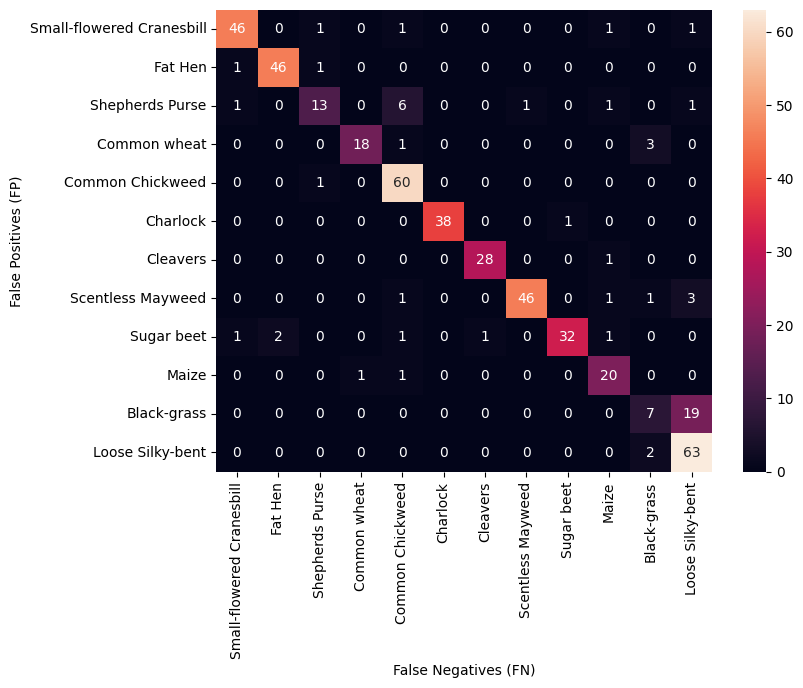

In [119]:
# Compute Confusion matrix
cm4 = confusion_matrix(normal_y_test, y_test_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm4, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Model4 seems to perform well overall, but there is some variation in the performance of the model for different classes.  


##**Model 5**

To continue trying to improve the previous model, we add more layers to our model.

Layers : 19

Layer 1: Convolutional layer : 32 filters, Kernel_size = (3,3), Relu

Layer 2: BatchNormalization()

Layer 3: MaxPooling2D layer

Layer 4: Convolutional layer : 64 filters, Kernel_size = (3,3), Relu

Layer 5: BatchNormalization()

Layer 6: MaxPooling2D layer

Layer 7: Convolutional layer : 128 filters, Kernel_size = (3,3), Relu

Layer 8: BatchNormalization()

Layer 9: MaxPooling2D layer

Layer 10: Convolutional layer : 256 filters, Kernel_size = (3,3), Relu

Layer 11: BatchNormalization()

Layer 12: MaxPooling2D layer

Layer 13: Convolutional layer : 128 filters, Kernel_size = (3,3), Relu

Layer 14: BatchNormalization()

Layer 15: MaxPooling2D layer

Layer 16: Flatten layer

Layer 17: Dense layer : 256 neurons, Relu

Layer 18: BatchNormalization

Layer 19: Droput layer: 0.5

Optimizer: Adam

In [120]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [121]:
# initialized a sequential model
model5 = Sequential()

model5.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation='softmax'))

# Compile the model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

**Model5 Architecture Visualization**

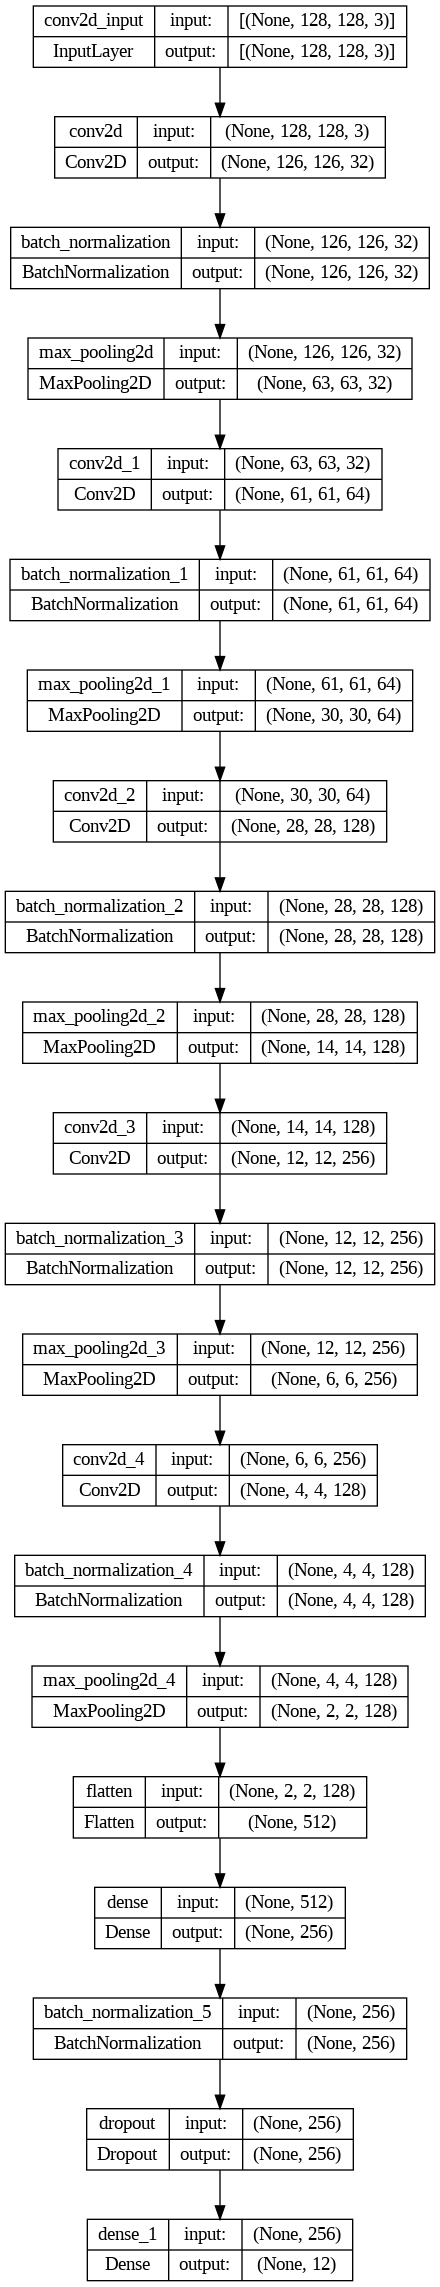

In [122]:
##visualize model architecture
plot_model(model5, to_file='model5_plot.png', show_shapes=True, show_layer_names=True)

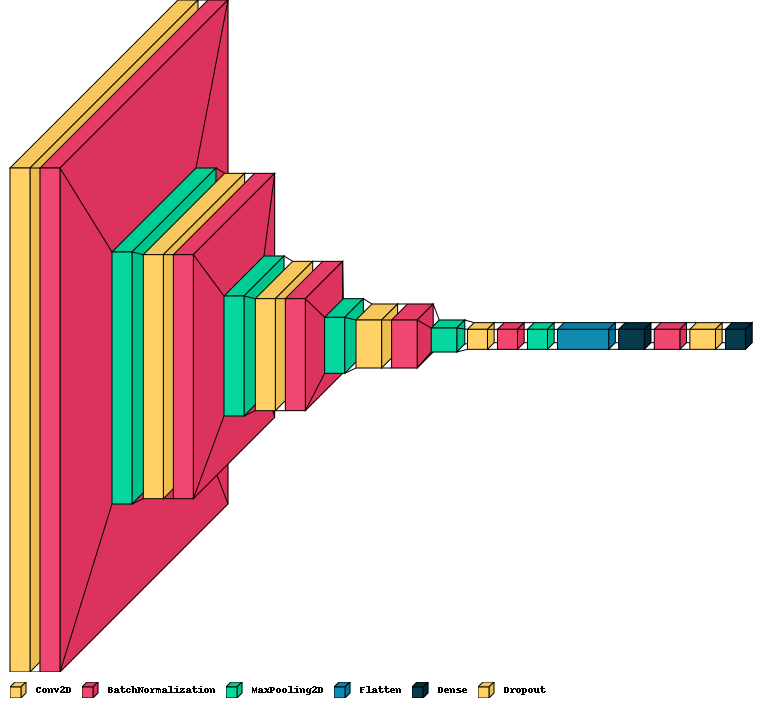

In [123]:
##model architecture visualization using visualkeras
visualkeras.layered_view(model5, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [128]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 100 epochs and validation_split as 10%
history5 = model5.fit(X_train, 
          y_train_onehot,  
          epochs=100, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc]) 

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 1.6742 - accuracy: 0.5027
Epoch 1: val_accuracy improved from -inf to 0.06308, saving model to best_model.h5
121/121 [==============================] - 15s 41ms/step - loss: 1.6742 - accuracy: 0.5027 - val_loss: 7.5660 - val_accuracy: 0.0631
Epoch 2/100
121/121 [==============================] - ETA: 0s - loss: 0.9033 - accuracy: 0.6964
Epoch 2: val_accuracy improved from 0.06308 to 0.12150, saving model to best_model.h5
121/121 [==============================] - 3s 28ms/step - loss: 0.9033 - accuracy: 0.6964 - val_loss: 14.3085 - val_accuracy: 0.1215
Epoch 3/100
119/121 [============================>.] - ETA: 0s - loss: 0.6271 - accuracy: 0.7844
Epoch 3: val_accuracy did not improve from 0.12150
121/121 [==============================] - 3s 26ms/step - loss: 0.6265 - accuracy: 0.7840 - val_loss: 11.6241 - val_accuracy: 0.1215
Epoch 4/100
119/121 [============================>.] - ETA: 0s - loss: 0.4865 - accuracy: 

Training stopped at epoch 15. The highest validation accuracy was 0.8575 and validation loss is 0.4383.

**Accuracy vs Epoch curve**

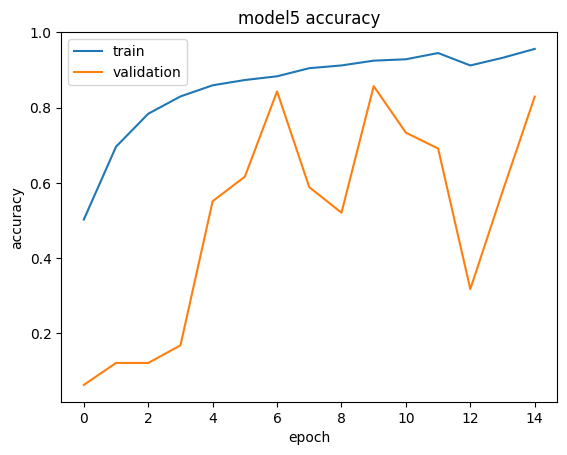

In [129]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The model is overfitting. However, around epoch 9, it has a high validation accuracy and a high training accuracy.

**Evaluation of model5 model.evaluate using the Test data**

In [130]:
# Evaluate the model on the test data
score5 = model5.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.5987040400505066
Test accuracy: 0.8252631425857544


In [131]:
# Test Prediction 
y_pred = model5.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 9ms/step


In [132]:
# Test Accuracy 
accuracyScore5 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore5)

0.8252631578947368


**Classification Report**

In [133]:
# Compute the classification report
cr5 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr5)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.90      0.94      0.92        50
                  Fat Hen       1.00      0.83      0.91        48
          Shepherds Purse       0.90      0.78      0.84        23
             Common wheat       0.80      0.55      0.65        22
         Common Chickweed       0.88      0.92      0.90        61
                 Charlock       0.95      1.00      0.97        39
                 Cleavers       0.90      0.90      0.90        29
        Scentless Mayweed       0.79      0.96      0.87        52
               Sugar beet       0.95      0.55      0.70        38
                    Maize       0.94      0.73      0.82        22
              Black-grass       0.39      0.27      0.32        26
         Loose Silky-bent       0.64      0.92      0.75        65

                 accuracy                           0.83       475
                macro avg       0.84

The accuracy of the model5 is 83%, and the weighted average F1-score is 0.82. The model performs relatively well in predicting most of the plant species, with high precision, recall and f1-scores, except for Black-grass. 

However Model4 seems to be performing slightly better.

In [335]:
Scoresdf = Scoresdf.append({'model':'Model5','accuracy':accuracyScore5,'layers':'20','total parameters':'821,324', 'neurons':'256', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

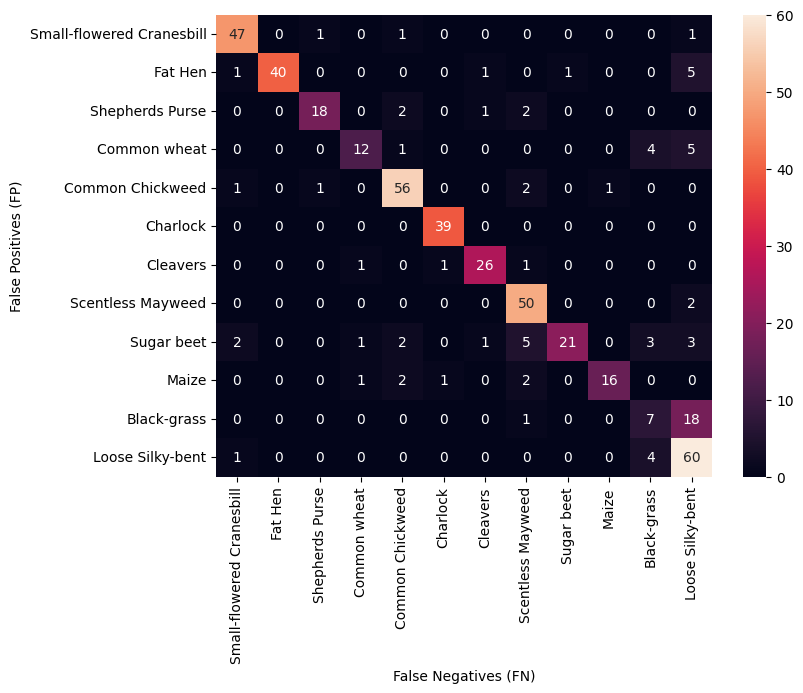

In [134]:
#Visualize the Confusion matrix 
cm5 = confusion_matrix(normal_y_test, y_test_pred_classes)
plt.figure(figsize=(8,6))

sns.heatmap(cm5, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Model5 performs well for most classes but Black-grass.

##**Model 6**

To try to improve the performance of our previous models, we changethe layers and filters.

Layers: 16
- Layer 1: Convolution, filter: 64, kernel 3,3
- Layer 2: BatchNormalization
- Layer 3: MaxPooling2D
- Layer 4: Convolution, filter 128, kernel 3,3
- Layer 5: BatchNormalization
- Layer 6: MaxPooling2D
- Layer 7: Convolution, filter 256, kernel 3,3
- Layer 8: BatchNormalization
- Layer 9: MaxPooling2D
- Layer 10: Convolution, filter 512, kernel 3,3
- Layer 11: BatchNormalization
- Layer 12: MaxPooling2D
- Layer 13: Flatten
- Layer 14: Dense 256
- Layer 15: BatchNormalization
- Layer 16: Dropout 0.5


In [135]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [136]:
# initialized a sequential model
model6 = Sequential()

model6.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

model6.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

model6.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(256, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax'))

# Compile the model
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model6.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 128)      512       
 hNormalization)                                                 
                                                        

**Model6 Architecture Visualization**

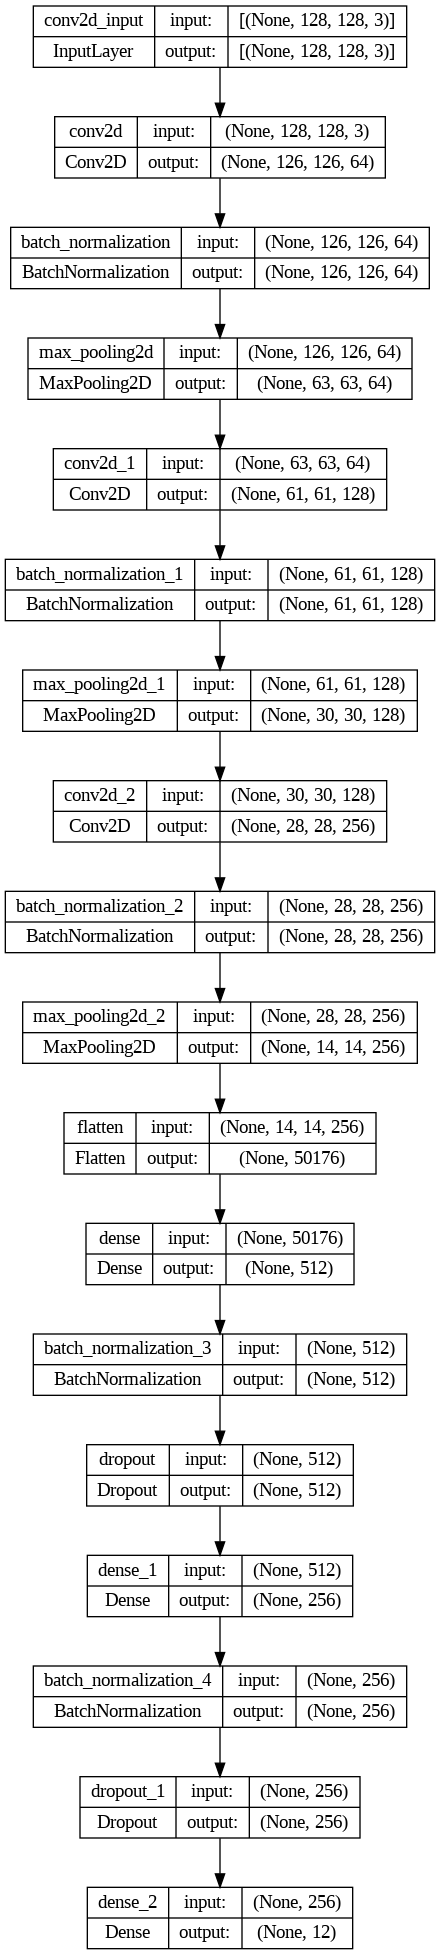

In [137]:
#visualize model6 architecture
plot_model(model6, to_file='model6_plot.png', show_shapes=True, show_layer_names=True)

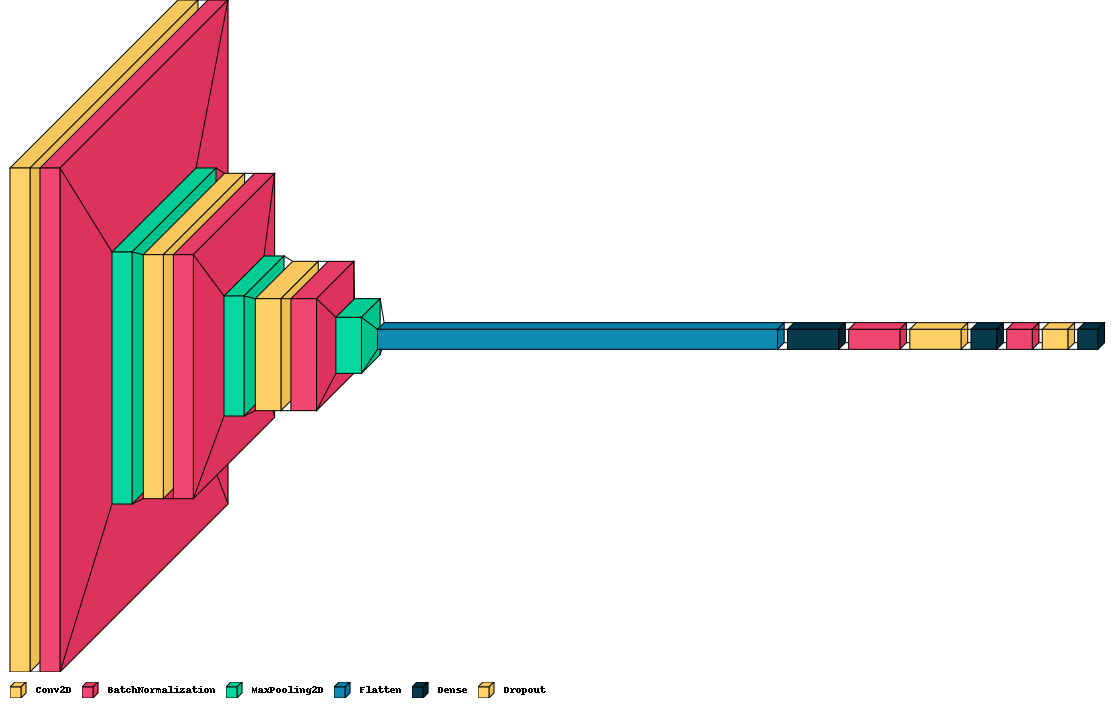

In [138]:
#visualize model6 architecture using visualkeras
visualkeras.layered_view(model6, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [139]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 40 epochs and validation_split as 10%
history6=model6.fit(X_train, 
          y_train_onehot,  
          epochs=40, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc]) 

Epoch 1/40
121/121 [==============================] - ETA: 0s - loss: 1.9508 - accuracy: 0.4333
Epoch 1: val_accuracy improved from -inf to 0.12150, saving model to best_model.h5
121/121 [==============================] - 14s 76ms/step - loss: 1.9508 - accuracy: 0.4333 - val_loss: 7.4120 - val_accuracy: 0.1215
Epoch 2/40
120/121 [============================>.] - ETA: 0s - loss: 1.0981 - accuracy: 0.6617
Epoch 2: val_accuracy did not improve from 0.12150
121/121 [==============================] - 7s 59ms/step - loss: 1.0994 - accuracy: 0.6613 - val_loss: 8.0671 - val_accuracy: 0.1215
Epoch 3/40
120/121 [============================>.] - ETA: 0s - loss: 0.7742 - accuracy: 0.7349
Epoch 3: val_accuracy improved from 0.12150 to 0.17056, saving model to best_model.h5
121/121 [==============================] - 8s 62ms/step - loss: 0.7752 - accuracy: 0.7349 - val_loss: 7.4708 - val_accuracy: 0.1706
Epoch 4/40
120/121 [============================>.] - ETA: 0s - loss: 0.6962 - accuracy: 0.7693

Training stopped at epoch 24. The highest Validation accuracy was 0.8481 and validation loss 0.5729.

**Model6 Accuracy vs Epoch curve**

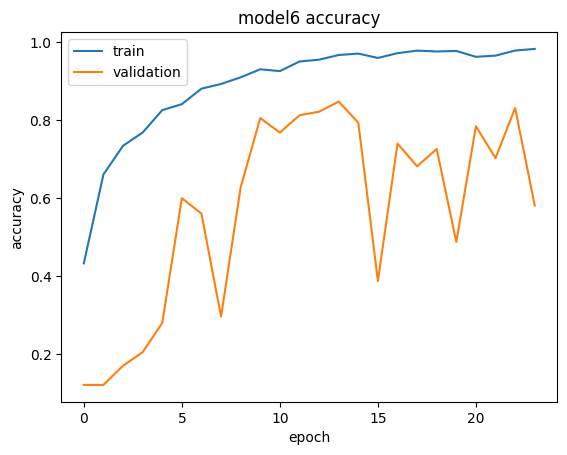

In [146]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

This model seems to be overfitting.

**Evaluation of model6 model.evaluate using the Test data**

In [147]:
# Evaluate the model on the test data
score6 = model6.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Test loss: 2.657069444656372
Test accuracy: 0.5621052384376526


In [148]:
# Test Prediction 
y_pred = model6.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 14ms/step


In [149]:
# Test Accuracy 
accuracyScore6 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore6)

0.5621052631578948


**Classification Report**

In [150]:
# Compute the classification report
cr6 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr6)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.92      0.66      0.77        50
                  Fat Hen       0.90      0.54      0.68        48
          Shepherds Purse       0.56      0.22      0.31        23
             Common wheat       0.78      0.64      0.70        22
         Common Chickweed       0.95      0.33      0.49        61
                 Charlock       1.00      0.51      0.68        39
                 Cleavers       0.95      0.69      0.80        29
        Scentless Mayweed       0.26      1.00      0.42        52
               Sugar beet       1.00      0.03      0.05        38
                    Maize       0.88      0.64      0.74        22
              Black-grass       0.75      0.12      0.20        26
         Loose Silky-bent       0.57      0.91      0.70        65

                 accuracy                           0.56       475
                macro avg       0.79

The model seems to be overfitting as it has high accuracy on the training set but low accuracy on the test set. The precision, recall, and F1-score for each class also vary widely, with some classes having high scores and others having low scores. This suggests that the model is not performing well in some classes.

In [336]:
Scoresdf = Scoresdf.append({'model':'Model6','accuracy':accuracyScore6,'layers':'17','total parameters':'26,200,716', 'neurons':'256', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

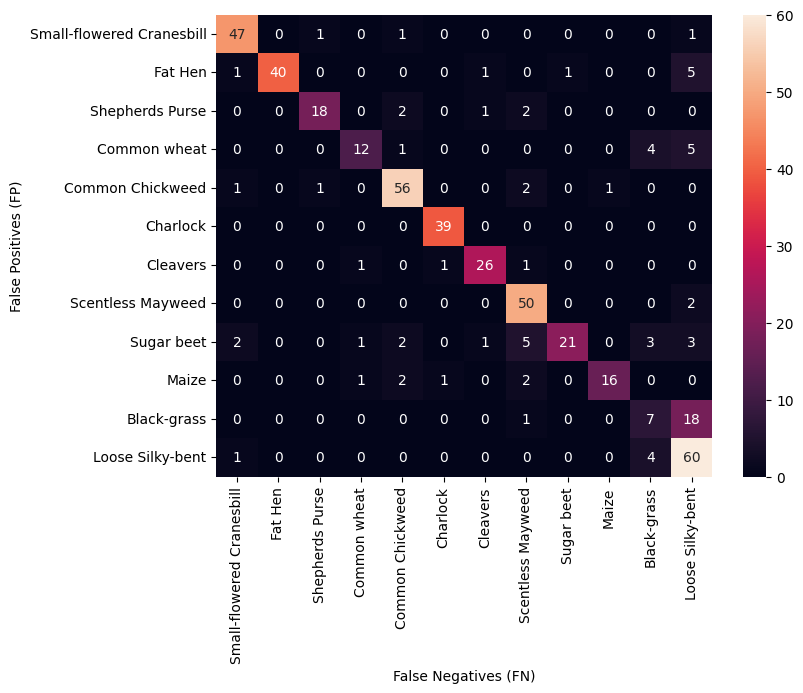

In [151]:
# Calculate Confusion matrix 
cm6 = confusion_matrix(normal_y_test, y_test_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm5, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Overall, Model6 doesn't perform well for some classes and is overfitting.

##**Model 7**

To continue trying to improve our model, we added more layers and modified the filter sizes.

- Conv2D layer with 32 filters, a 3x3 kernel size, and ReLU activation.
- Conv2D layer with 32 filters, a 3x3 kernel size, and ReLU activation.
- BatchNormalization layer to normalize the output of the previous layers.
- MaxPooling2D layer with a 2x2 pool size to reduce the spatial dimensions of the output.
- Dropout layer to randomly set a fraction of the input units to 0 to prevent overfitting.
- Conv2D layer with 64 filters, a 3x3 kernel size, and ReLU activation.
- Conv2D layer with 64 filters, a 3x3 kernel size, and ReLU activation.
- BatchNormalization layer.
- MaxPooling2D layer.
- Dropout layer.
- Conv2D layer with 128 filters, a 3x3 kernel size, and ReLU activation.
- Conv2D layer with 128 filters, a 3x3 kernel size, and ReLU activation.
- BatchNormalization layer.
- MaxPooling2D layer.
- Dropout layer.
- Flatten layer to convert the output of the previous layers to a 1D vector.
- Dense layer with 512 units and ReLU activation.
- BatchNormalization layer.
- Dropout layer.

In [152]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [153]:
#Model implementation
model7 = Sequential()

model7.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model7.add(Conv2D(32, (3, 3), activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Flatten())
model7.add(Dense(512, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

**Model7 Architecture Visualization**

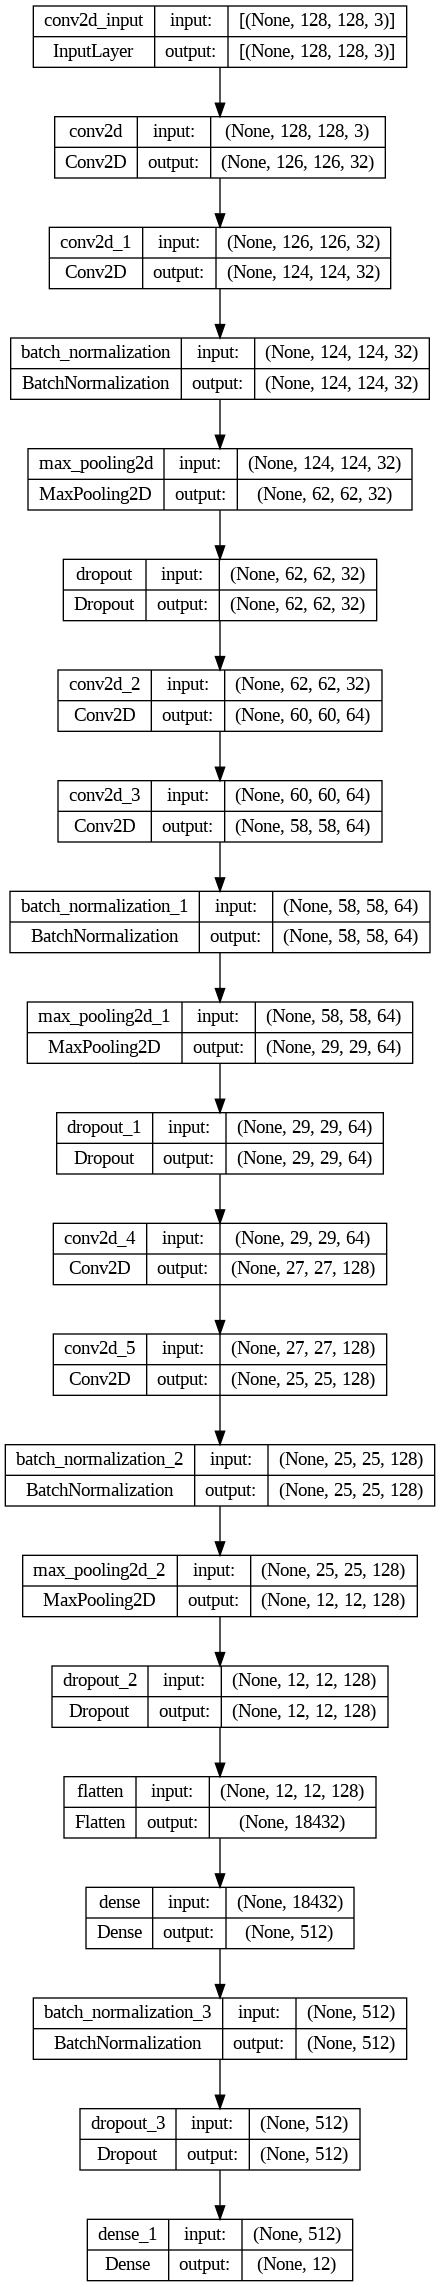

In [337]:
#visualize model7 architecture
plot_model(model7, to_file='model7_plot.png', show_shapes=True, show_layer_names=True)

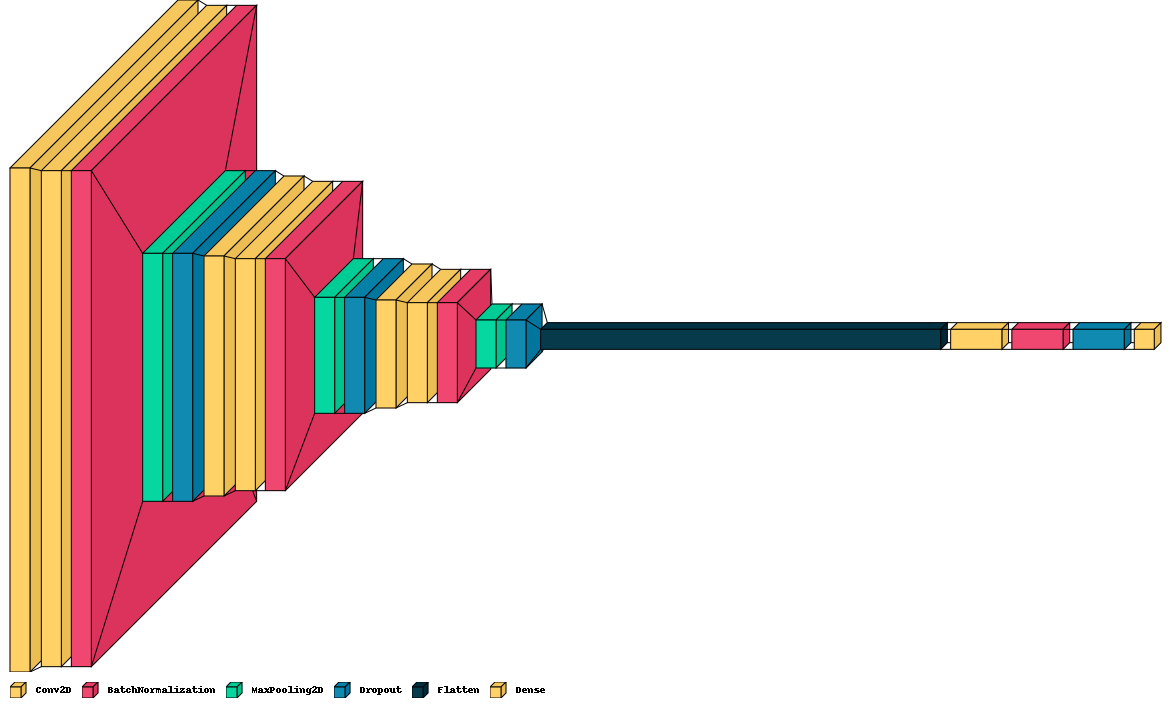

In [154]:
#visualize model7 architecture using visualkeras
visualkeras.layered_view(model7, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [155]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 100 epochs and validation_split as 10%
history7=model7.fit(X_train, 
          y_train_onehot,  
          epochs=100, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc]) 

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 1.8702 - accuracy: 0.4645
Epoch 1: val_accuracy improved from -inf to 0.12150, saving model to best_model.h5
121/121 [==============================] - 15s 77ms/step - loss: 1.8702 - accuracy: 0.4645 - val_loss: 16.9230 - val_accuracy: 0.1215
Epoch 2/100
120/121 [============================>.] - ETA: 0s - loss: 0.9498 - accuracy: 0.7016
Epoch 2: val_accuracy did not improve from 0.12150
121/121 [==============================] - 8s 69ms/step - loss: 0.9510 - accuracy: 0.7011 - val_loss: 17.2805 - val_accuracy: 0.1215
Epoch 3/100
120/121 [============================>.] - ETA: 0s - loss: 0.6415 - accuracy: 0.7870
Epoch 3: val_accuracy did not improve from 0.12150
121/121 [==============================] - 8s 64ms/step - loss: 0.6428 - accuracy: 0.7868 - val_loss: 17.0637 - val_accuracy: 0.1215
Epoch 4/100
120/121 [============================>.] - ETA: 0s - loss: 0.5017 - accuracy: 0.8240
Epoch 4: val_accuracy impro

Training stopped at epoch 27. The highest validation accuracy was 0.8578 with validation loss of 0.25

**Model7 Accuracy vs Epoch curve**

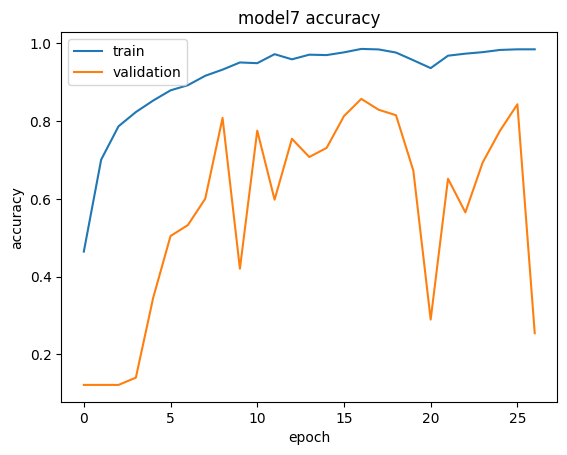

In [164]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is overfitting

**Model7 Evaluation of model model.evaluate using the Test data**

In [165]:
# Evaluate the model on the test data
score7 = model7.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Test loss: 9.582252502441406
Test accuracy: 0.24421052634716034


In [166]:
# Test Prediction 
y_pred = model7.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 14ms/step


In [167]:
# Test Accuracy 
accuracyScore7 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore7)

0.24421052631578946


**Classification Report**

In [168]:
# Compute the classification report
cr7 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr7)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.95      0.36      0.52        50
                  Fat Hen       0.00      0.00      0.00        48
          Shepherds Purse       0.00      0.00      0.00        23
             Common wheat       0.17      0.55      0.26        22
         Common Chickweed       0.00      0.00      0.00        61
                 Charlock       0.28      0.90      0.43        39
                 Cleavers       0.00      0.00      0.00        29
        Scentless Mayweed       0.22      0.67      0.33        52
               Sugar beet       0.00      0.00      0.00        38
                    Maize       0.12      0.50      0.19        22
              Black-grass       0.00      0.00      0.00        26
         Loose Silky-bent       1.00      0.08      0.14        65

                 accuracy                           0.24       475
                macro avg       0.23

The accuracy of the model is very low at 0.24. For most of the classes, precision, recall, and f1-score are also very low. This suggests that the model is not able to classify the images correctly, and the predictions made by the model are almost random. Therefore, it is not a valid model.

In [338]:
Scoresdf = Scoresdf.append({'model':'Model7','accuracy':accuracyScore7,'layers':'20','total parameters':'9,733,804', 'neurons':'512', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

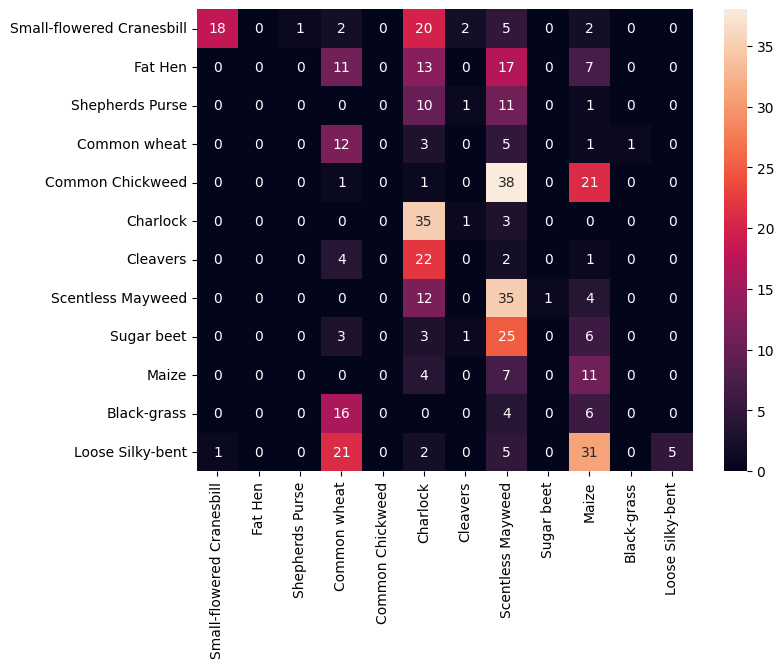

In [169]:
# Compute the Confusion matrix 
cm7 = confusion_matrix(normal_y_test, y_test_pred_classes)

plt.figure(figsize=(8,6))
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
sns.heatmap(cm7, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.show()

Model7 is not a valid model.

###**Model8**

Continuing trying to improve the previous model, we changed the number of layers and neurons.

- Convolutional layer, 64 filters, kernel (3,3), ReLU 
- Batch normalization
- MaxPooling2D
- Convolutional layer, 128 filters, kernel (3,3).
- Batch normalization
- MaxPooling2D
- Convolutional layer, 256 filters, kernel (3,3).
- Batch normalization
- MaxPooling2D
- Convolutional layer, 128 filters, kernel (3,3).
- Batch normalization
- MaxPooling2D
- Convolutional layer, 64 filters, kernel (5,5).
- Batch normalization
- MaxPooling2D
- Flatten Layer
- Dense Layer, 256 neurons
- BatchNormalization
- Drop Layer 0.5


In [171]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Model Implementation**

In [172]:
# initialized a sequential model
model8 = Sequential()

model8.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2,2)))

model8.add(Flatten())
model8.add(Dense(256, activation='relu'))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))
model8.add(Dense(num_classes, activation='softmax'))

# Compile the model
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 128)      512       
 hNormalization)                                                 
                                                        

**Model8 Architecture Visualization**

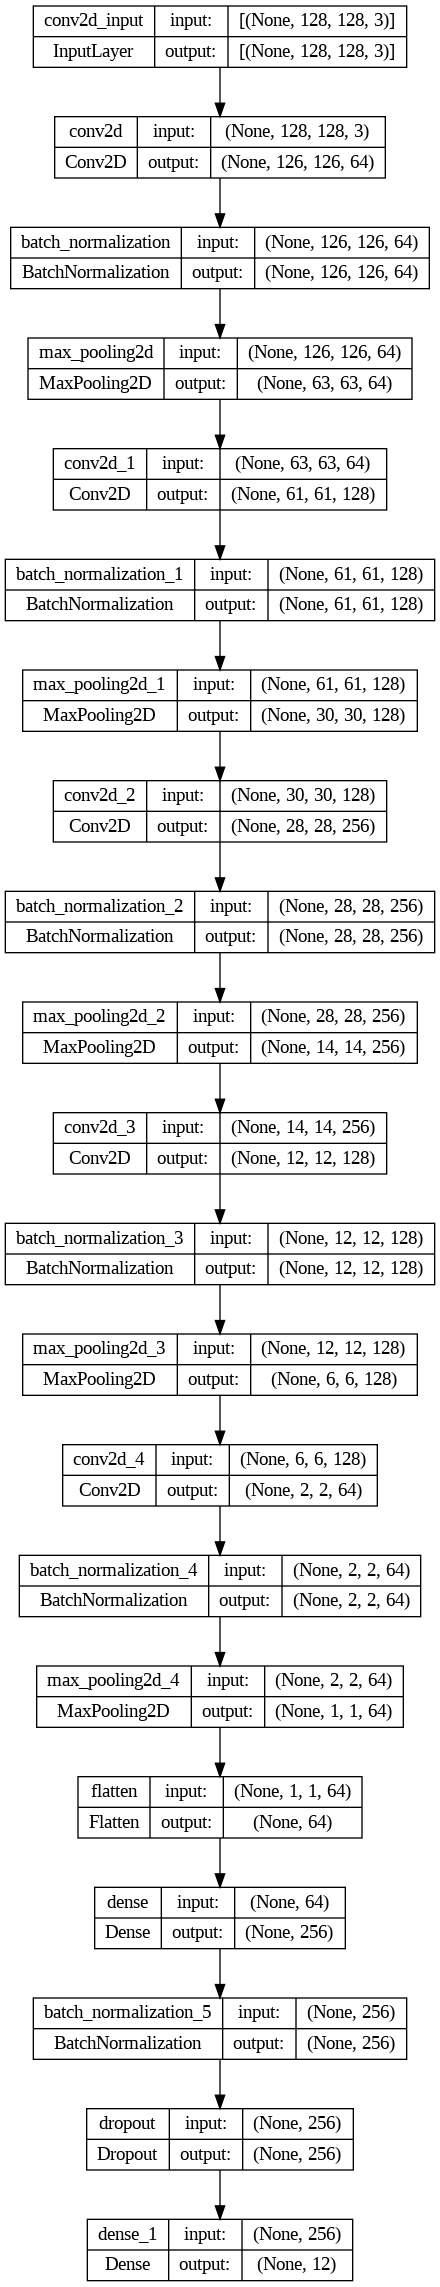

In [173]:
#visualize model4 architecture
plot_model(model8, to_file='model8_plot.png', show_shapes=True, show_layer_names=True)

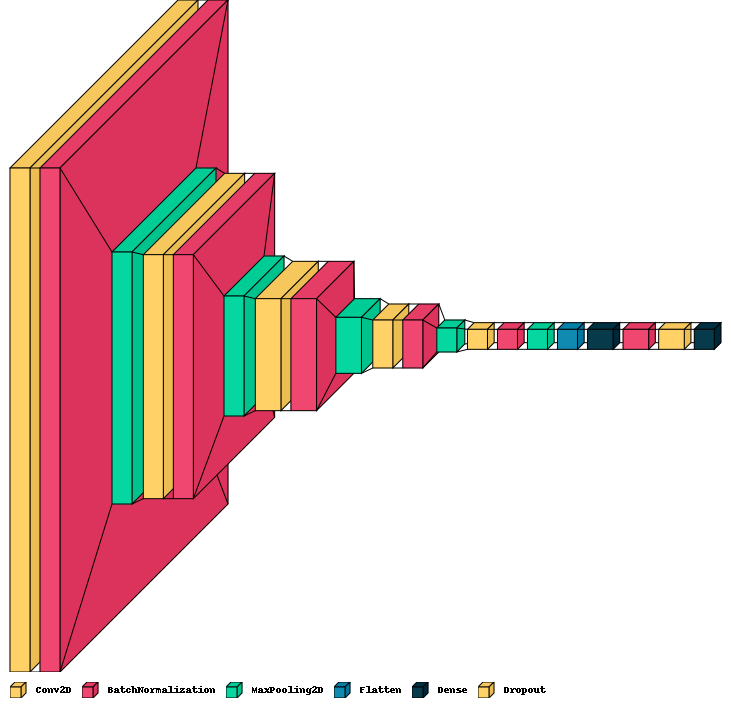

In [174]:
#visualize model8 architecture using visualkeras
visualkeras.layered_view(model8, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [175]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 100 epochs and validation_split as 10%
history8=model8.fit(X_train, 
          y_train_onehot,  
          epochs=100, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc]) 

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 1.8790 - accuracy: 0.4396
Epoch 1: val_accuracy improved from -inf to 0.12150, saving model to best_model.h5
121/121 [==============================] - 16s 55ms/step - loss: 1.8790 - accuracy: 0.4396 - val_loss: 7.6993 - val_accuracy: 0.1215
Epoch 2/100
120/121 [============================>.] - ETA: 0s - loss: 1.0419 - accuracy: 0.6690
Epoch 2: val_accuracy did not improve from 0.12150
121/121 [==============================] - 6s 49ms/step - loss: 1.0428 - accuracy: 0.6686 - val_loss: 13.5207 - val_accuracy: 0.1215
Epoch 3/100
121/121 [==============================] - ETA: 0s - loss: 0.7727 - accuracy: 0.7466
Epoch 3: val_accuracy improved from 0.12150 to 0.13551, saving model to best_model.h5
121/121 [==============================] - 6s 49ms/step - loss: 0.7727 - accuracy: 0.7466 - val_loss: 11.2206 - val_accuracy: 0.1355
Epoch 4/100
120/121 [============================>.] - ETA: 0s - loss: 0.5631 - accuracy: 

Training stopped at epoch 20. The highest validation accuracy was 0.8916 with a validation loss of 0.3837.

**Model8 Accuracy vs Epoch curve**

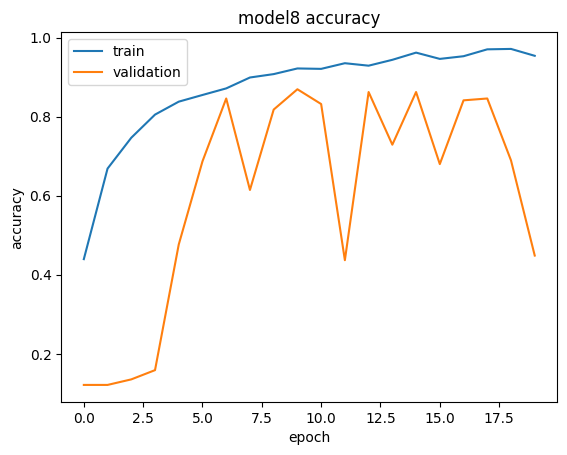

In [181]:
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model8 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The model overfits.

**Model8 Evaluation of model model.evaluate using the Test data**

In [182]:
# Evaluate the model on the test data
score8 = model8.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 3.9417619705200195
Test accuracy: 0.43157893419265747


In [183]:
# Test Prediction 
y_pred = model8.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 15ms/step


In [184]:
# Test Accuracy 
accuracyScore8 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore8)

0.43157894736842106


**Classification Report**

In [185]:
# Compute the classification report
cr8 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr8)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.58      0.80      0.67        50
                  Fat Hen       1.00      0.08      0.15        48
          Shepherds Purse       0.50      0.26      0.34        23
             Common wheat       0.65      0.50      0.56        22
         Common Chickweed       1.00      0.03      0.06        61
                 Charlock       0.76      0.72      0.74        39
                 Cleavers       0.90      0.31      0.46        29
        Scentless Mayweed       0.25      0.96      0.40        52
               Sugar beet       0.50      0.05      0.10        38
                    Maize       0.23      0.50      0.31        22
              Black-grass       0.80      0.15      0.26        26
         Loose Silky-bent       0.58      0.58      0.58        65

                 accuracy                           0.43       475
                macro avg       0.64

Overall the accuracy is low at 0.43. We have developed better models earlier.

In [339]:
Scoresdf = Scoresdf.append({'model':'Model8','accuracy':accuracyScore8,'layers':'20','total parameters':'894,028', 'neurons':'256', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

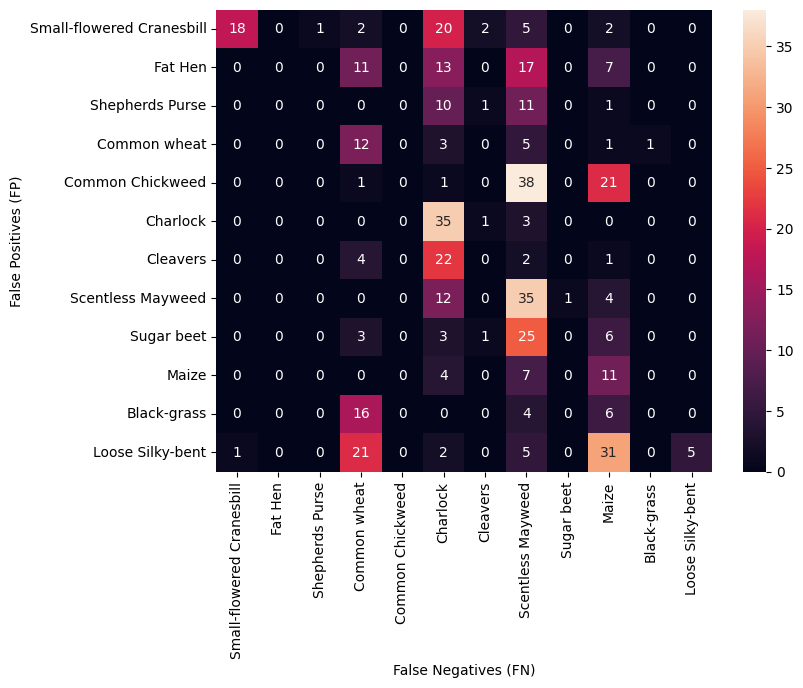

In [180]:
# Compute Confusion matrix
cm8 = confusion_matrix(normal_y_test, y_test_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm8, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

From the confusion matrix we can observe that Model8 is unable to predict many classes correctly at all. Overall, this is not a good model.

##**Model 9**

In [227]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

This will be our final model trying to improve our previous models. Again, we will modify the number of layers, filter size and neurons.

**Model Implementation**

In [232]:
# Intializing a sequential model
model9 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model9.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=input_shape))
model9.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model9.add(MaxPooling2D((2, 2), padding = 'same'))

model9.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model9.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model9.add(MaxPooling2D((2, 2), padding = 'same'))
model9.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model9.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model9.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model9.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.25))
model9.add(Dense(64, activation='relu'))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model9.add(Dense(num_classes, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [340]:
model9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

**Model9 Architecture Visualization**

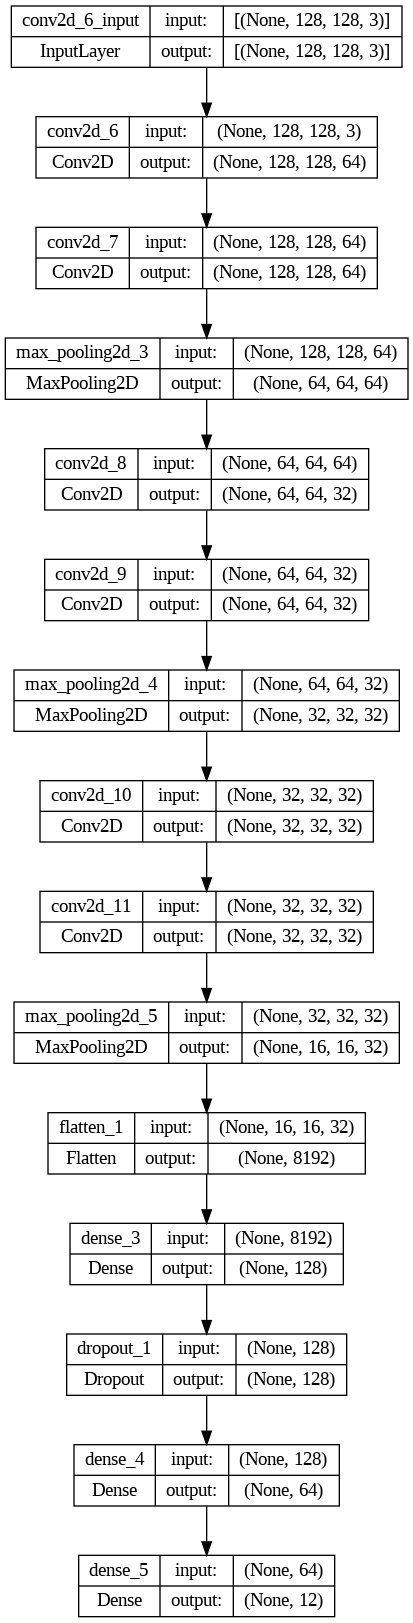

In [233]:
#visualize model9 architecture
plot_model(model9, to_file='model9_plot.png', show_shapes=True, show_layer_names=True)

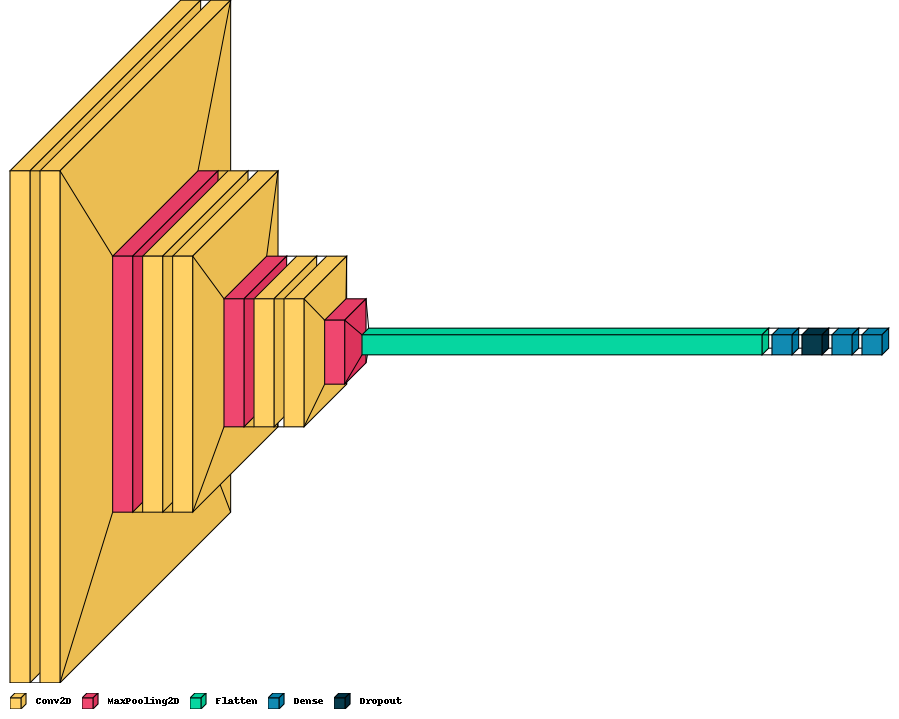

In [234]:
#visualize model9 architecture using visualkeras
visualkeras.layered_view(model9, legend=True)

**Early Stopping**

Use early stopping to terminate the epochs if the validation loss continues to increase or flats. We are monitoring for early stopping the validation loss (so mode='min'). Also, we set patience to 10. And we save the epoch with the highest validation accuracy.

In [235]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 100 epochs and validation_split as 10%
history9=model9.fit(X_train, 
          y_train_onehot,  
          epochs=100, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc]) 

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 2.3441 - accuracy: 0.1869
Epoch 1: val_accuracy improved from -inf to 0.33645, saving model to best_model.h5
121/121 [==============================] - 15s 71ms/step - loss: 2.3441 - accuracy: 0.1869 - val_loss: 1.9613 - val_accuracy: 0.3364
Epoch 2/100
120/121 [============================>.] - ETA: 0s - loss: 1.6789 - accuracy: 0.4146
Epoch 2: val_accuracy improved from 0.33645 to 0.42991, saving model to best_model.h5
121/121 [==============================] - 6s 53ms/step - loss: 1.6793 - accuracy: 0.4143 - val_loss: 1.5914 - val_accuracy: 0.4299
Epoch 3/100
120/121 [============================>.] - ETA: 0s - loss: 1.4057 - accuracy: 0.5120
Epoch 3: val_accuracy improved from 0.42991 to 0.57009, saving model to best_model.h5
121/121 [==============================] - 6s 51ms/step - loss: 1.4049 - accuracy: 0.5123 - val_loss: 1.2518 - val_accuracy: 0.5701
Epoch 4/100
121/121 [==============================] - ET

Training stopped at epoch 20. The highest validation accuracy was 0.79907 with a validation loss of 1.145.

**Model9 Accuracy vs Epoch curve**

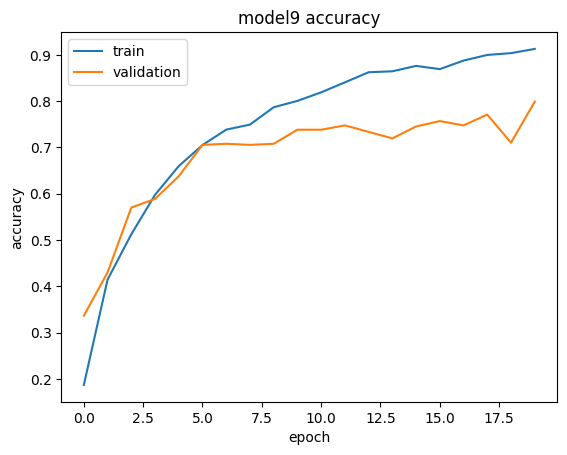

In [236]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model9 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The model overfits.

**Model9 Evaluation of model model.evaluate using the Test data**

In [237]:
# Evaluate the model on the test data
score9 = model9.evaluate(X_test, y_test_onehot, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 3.9417619705200195
Test accuracy: 0.43157893419265747


In [238]:
# Test Prediction 
y_pred = model9.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
normal_y_test = np.argmax(y_test_onehot, axis=1)

15/15 [==============================] - 0s 16ms/step


In [239]:
# Test Accuracy 
accuracyScore9 = accuracy_score((normal_y_test), y_test_pred_classes)
print(accuracyScore8)

0.43157894736842106


**Classification Report**

In [240]:
# Compute the classification report
cr9 = classification_report(normal_y_test, y_test_pred_classes, target_names=name_classes)

print('Classification report:\n',cr9)

Classification report:
                            precision    recall  f1-score   support

Small-flowered Cranesbill       0.93      0.86      0.90        50
                  Fat Hen       0.68      0.88      0.76        48
          Shepherds Purse       0.62      0.43      0.51        23
             Common wheat       0.72      0.82      0.77        22
         Common Chickweed       0.85      0.87      0.86        61
                 Charlock       0.86      0.92      0.89        39
                 Cleavers       0.77      0.93      0.84        29
        Scentless Mayweed       0.74      0.75      0.74        52
               Sugar beet       0.92      0.61      0.73        38
                    Maize       0.67      0.73      0.70        22
              Black-grass       0.50      0.15      0.24        26
         Loose Silky-bent       0.75      0.89      0.82        65

                 accuracy                           0.78       475
                macro avg       0.75

Model9 with four convolutional layers indicates that the overall performance is good, with an accuracy of 78%. 

In [341]:
Scoresdf = Scoresdf.append({'model':'Model9','accuracy':accuracyScore9,'layers':'14','total parameters':'1,142,668', 'neurons':'64', 'optimizer':'Adam'},ignore_index=True)

**Confusion Matrix**

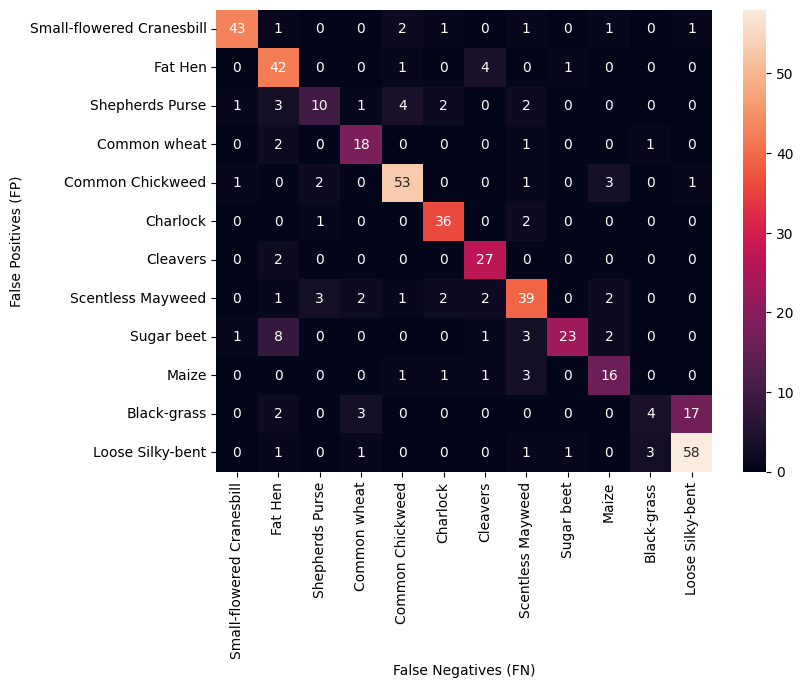

In [241]:
# Compute Confusion matrix
cm9 = confusion_matrix(normal_y_test, y_test_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm9, xticklabels=name_classes, yticklabels=name_classes, annot=True)
plt.xlabel("False Negatives (FN)")
plt.ylabel("False Positives (FP)")
plt.show()

Model9 performs well but not as good as Model4. 

## **Model Improvement and Model Comparison**

We tried to improve our model by implementing 9 models. One approach to implement a model is by changing the hyperparameters like optimizer, number of neurons, number of filters, adding convolution layers, batchnormalizers, changing the dropout rate, etc.

We performed these to improve our model's performance: 

- Architecture Modifications: Modifying the architecture of the CNN by adding or removing layers, changing the number of filters or neurons in each layer, or using different activation functions can improve performance. We implemented diverse models this way.

- Hyperparameter Tuning: Optimizing the hyperparameters of the model, such as learning rate, batch size, and optimizer, can improve performance. This can be done using techniques such as grid search or random search.  We changed the optimizer (Adam, SGD).

- Regularization: Regularization techniques such as dropout and L2 regularization can prevent overfitting and improve generalization performance. We performed dropout.

- Batch Normalization: Batch normalization is a technique that normalizes the inputs of each layer to prevent internal covariate shift. This can improve performance and reduce the number of epochs needed for training. We used batch Normalization.

- Early Stopping: Early stopping is a technique that stops training the model when the validation loss stops improving. This prevents overfitting and improves generalization performance.  We used Early stopping.


We didn't implement:

- Data Augmentation: Increasing the amount of data available for training the model can improve performance. Data augmentation techniques such as flipping, rotating, scaling, and cropping images can create new variations of the same images and help the model to generalize better.  However, this may require computational power so it may be expensive to perform.

- Transfer Learning: Pretrained models can be used as a starting point for training a new model. Transfer learning involves using the weights of a model trained on a large dataset, such as ImageNet, to initialize the weights of a new model. This can speed up training and improve performance. 



Ensembling: Ensemble methods involve combining the predictions of multiple models to improve performance. This can be done by training multiple CNN models with different hyperparameters or architectures and combining their predictions.


From Model Improvement we came up with 9 different models which are compared below:

In [342]:
Scoresdf

model  accuracy layers total parameters neurons optimizer
0  Model1  0.732632      8        7,393,868     128      Adam
1  Model2  0.791579     10        3,306,188     128      Adam
2  Model4  0.833684     17          834,252     128      Adam
3  Model3  0.757895     10        3,306,188     128       SGD
4  Model5  0.825263     20          821,324     256      Adam
5  Model6  0.562105     17       26,200,716     256      Adam
6  Model7  0.244211     20        9,733,804     512      Adam
7  Model8  0.431579     20          894,028     256      Adam
8  Model9  0.776842     14        1,142,668      64      Adam

The model that performed best was Model4 with an overall accuracy of 0.83. 

Model4 has 17 layers and trained 834,52 parameters. The fully connected layer had 128 neurons and the optimizer run was Adam.

The precision scores range from 0.48 to 0.95, indicating that the model's ability to correctly identify positive instances varies by class. For example, the model has high precision in identifying Charlock and Cleavers, while it has relatively lower precision in identifying Black-grass and Shepherds Purse.

The recall scores range from 0.50 to 0.97, indicating that the model's ability to correctly identify positive instances also varies by class. For example, the model has high recall in identifying Common Chickweed and Charlock, while it has relatively lower recall in identifying Black-grass and Shepherds Purse.

The F1-scores are a harmonic mean of precision and recall and range from 0.49 to 0.92. The F1-score provides a balance between precision and recall, indicating the overall performance of the model for each class.

## **Final Conclusions / Takeaways**

The best performing model obtained has 4 Conv2D layers, 128 filters per layer, and 2 Dense layers with 256 neurons each. This model achieved an accuracy of 83% on the test set, which is a significant improvement from the baseline model.

We could further try to improve the model's performance by trying mostly:

- Increase the size of the training dataset by collecting more images or using data augmentation techniques to generate new images from the existing ones.

- Try using pre-trained models such as VGG, ResNet or Inception and fine-tune them on your dataset.

- Continue to experiment with different hyperparameters such as batch size, number of epochs, and regularization techniques to find the best combination for your model.

We should notice that building a good performing CNN model requires a lot of experimentation and fine-tuning.

Additionally keep in mind:

- Larger filter sizes may cause loss of spatial resolution, overfitting, and high computational cost.
- Having too many convolution layers can cause overfitting, vanishing gradients, cause longer training times and produce results that are difficult to interpret.
- Having too many neurons may cause overfitting and slow down the training process.
- Dropout can help prevent overfitting
- BatchNormalization can help improve performance by estabilizing the training process and allow for higher learning rates

Overall, our model performs well but it needs to be fine tuned for the classes that are most difficult to classify, in our case, Black grass. 